In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_max_index(arr, num=1):
    index = np.array(list(range(len(arr)))).reshape(-1, 1)
    arr = arr.reshape(-1, 1)
    arr = list(np.concatenate([index, arr], axis=1))
    arr = sorted(arr, key=lambda x: x[1], reverse=True)
    for i in range(len(arr)):
        arr[i] = int(arr[i][0])
    return arr[:num]

In [3]:
def draw_DB(num=1,figsize=[24, 24]):
    names = np.load('./pred/processed/draw_tc_name.npy', allow_pickle=True)
    a = np.load('./pred/processed/draw_tc_num.npy', allow_pickle=True)
    tc = np.load('./pred/processed/for_draw.npy', allow_pickle=True)
    ind = find_max_index(a, num)
    for i in ind:
        tc_now = tc[a[:i].sum(): a[:i + 1].sum()]
        name = names[i]
        latitude_range = [np.min(tc_now[:, :, 2].reshape(-1)), np.max(tc_now[:, :, 2].reshape(-1))]
        padding = (latitude_range[1] - latitude_range[0]) * 0.15
        latitude_range = [latitude_range[0] - padding, latitude_range[1] + padding]
        longitude_range = [np.min(tc_now[:, :, 3].reshape(-1)), np.max(tc_now[:, :, 3].reshape(-1))]
        padding = (longitude_range[1] - longitude_range[0]) * 0.15
        longitude_range = [longitude_range[0] - padding, longitude_range[1] + padding]
        ld_lon, ru_lon, ld_lat, ru_lat = longitude_range[0], longitude_range[1], latitude_range[0], latitude_range[1]
        fig = plt.figure(figsize=figsize)
        for k in range(4):
            fig_ = plt.subplot(2, 2, k + 1)
            fig_.set_title('%d-hour forecast' % ((k + 1) * 6), fontsize=25)
            m = Basemap(llcrnrlon=ld_lon, llcrnrlat=ld_lat, urcrnrlon=ru_lon, urcrnrlat=ru_lat, projection='merc', resolution='i')
            m.drawcountries()
            m.drawcoastlines()
            m.fillcontinents()
            m.drawmeridians(range(0, 360, 10), labels=[1, 1, 0, 1], fontsize=20)
            m.drawparallels(range(-90, 100, 10), labels=[1, 1, 0, 1], fontsize=20)
            l1, = m.plot(tc_now[:, k, 3], tc_now[:, k, 2], ls='-.', marker='D', color='g', linewidth=1,
                        markersize=3, latlon='True')
            l2, = m.plot(tc_now[:, k, 1], tc_now[:, k, 0], ls='-.', marker='D', color='r', linewidth=1,
                        markersize=3, latlon='True')
            fig_.legend(handles=[l1, l2], labels=['truth', 'pred'], loc='lower right', fontsize=20)
        plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
        fig.suptitle(name, x=0.5, y=0.95, fontsize=30)
        plt.show()
        fig.savefig('./pictures/' + name + '.svg', dpi=600, format='svg')

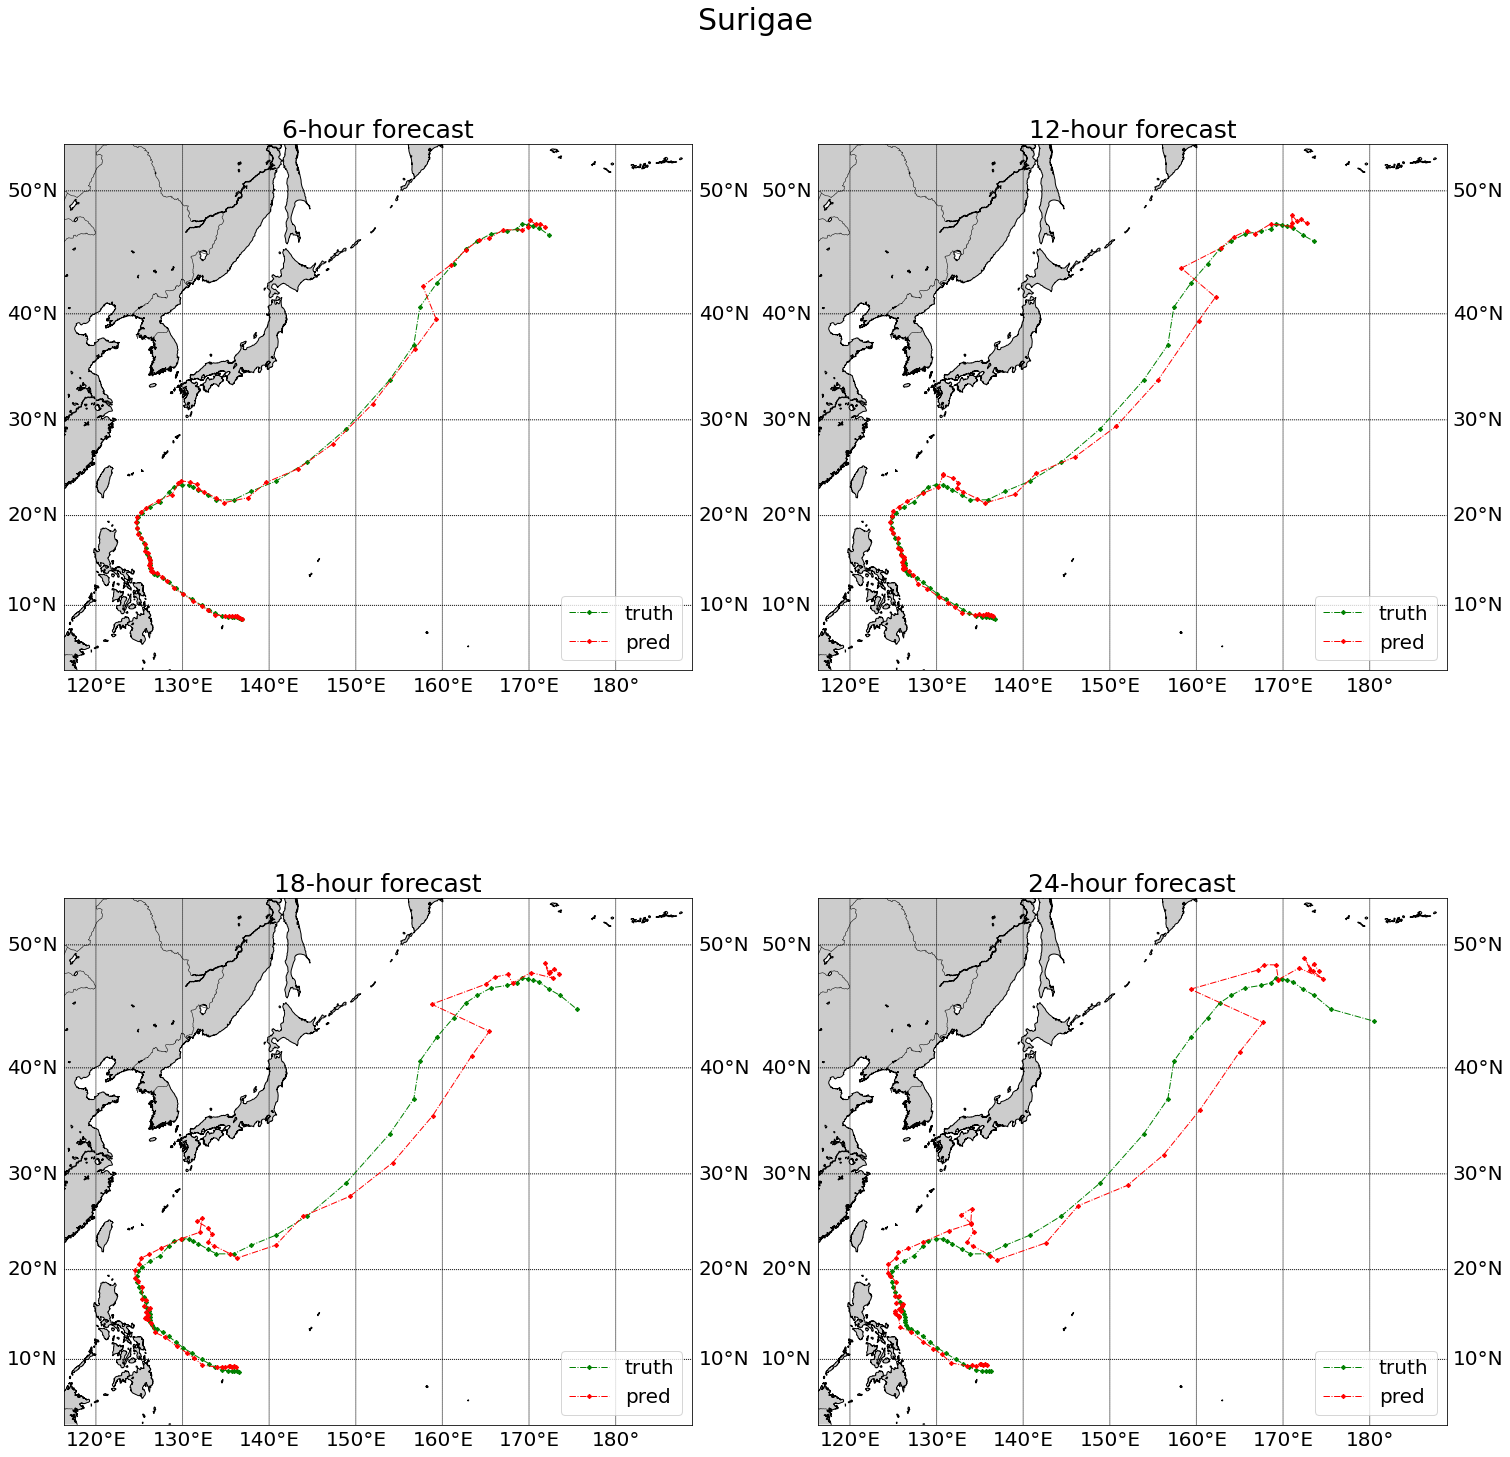

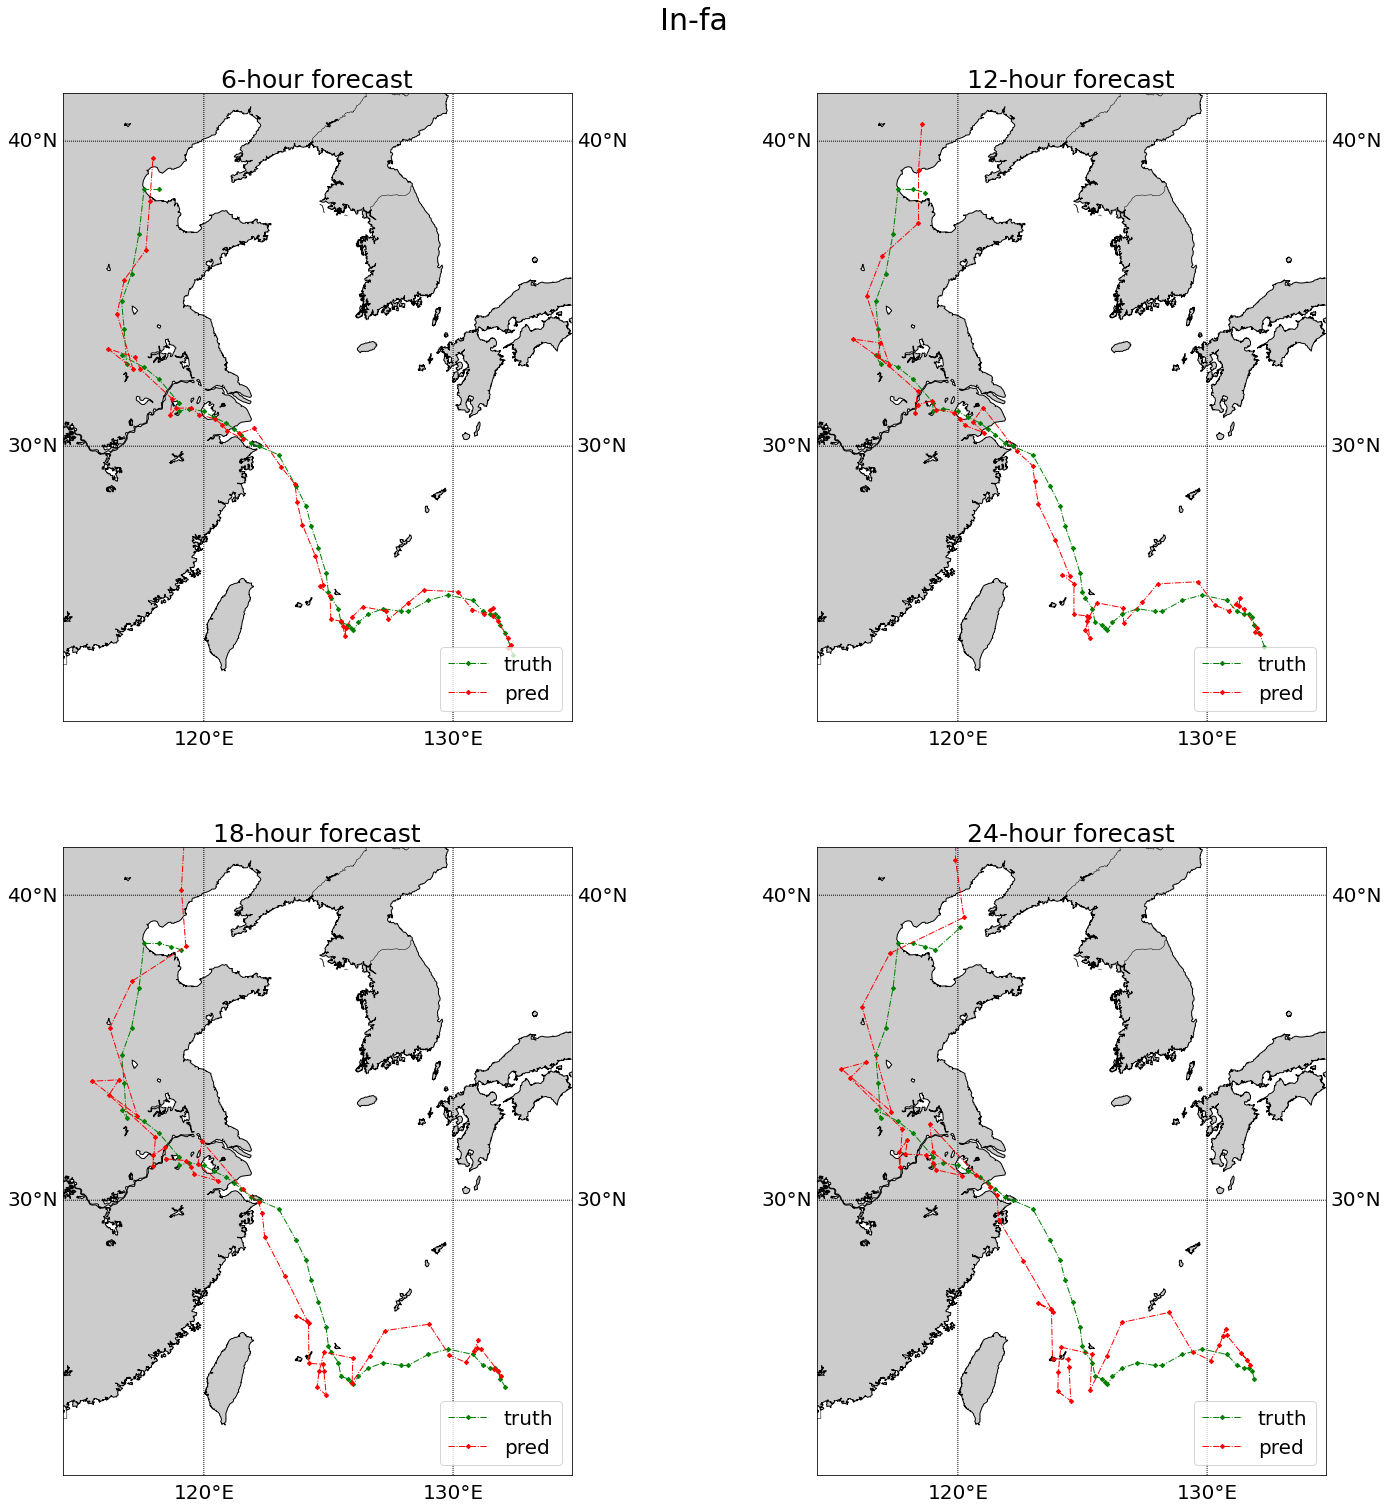

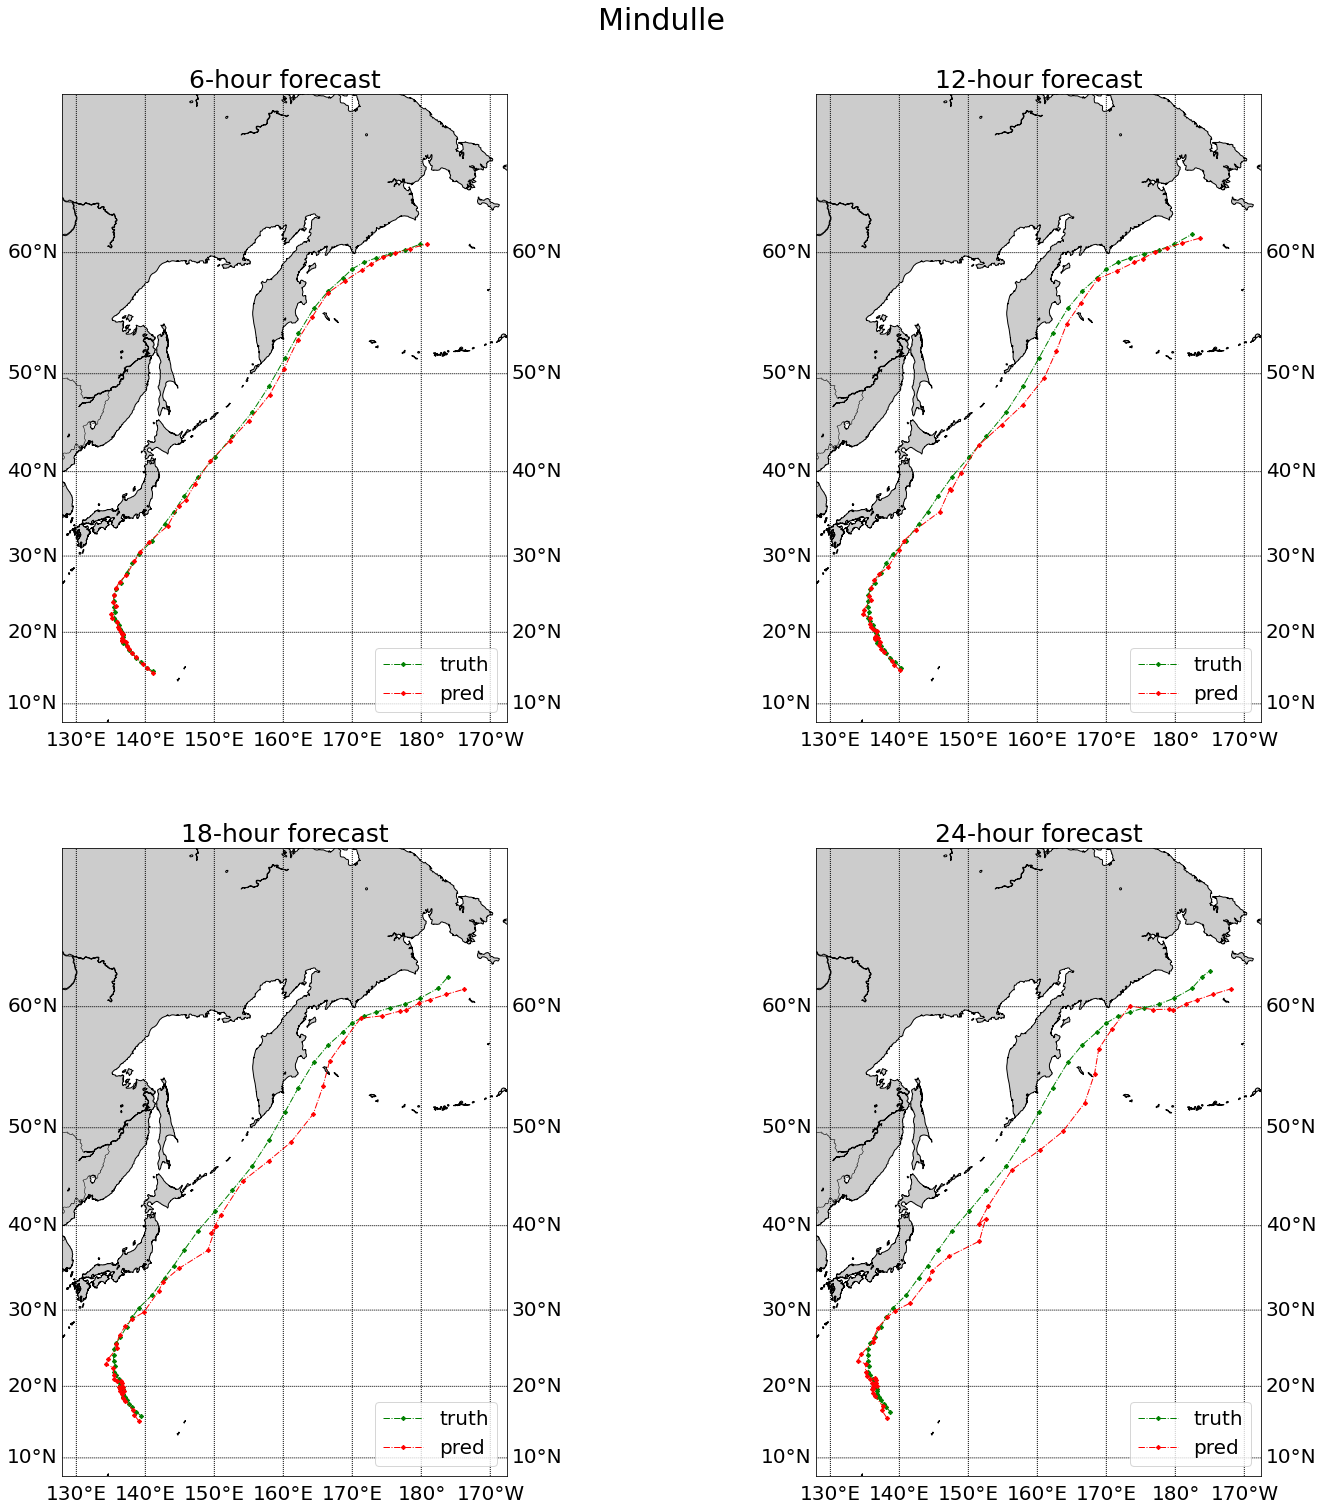

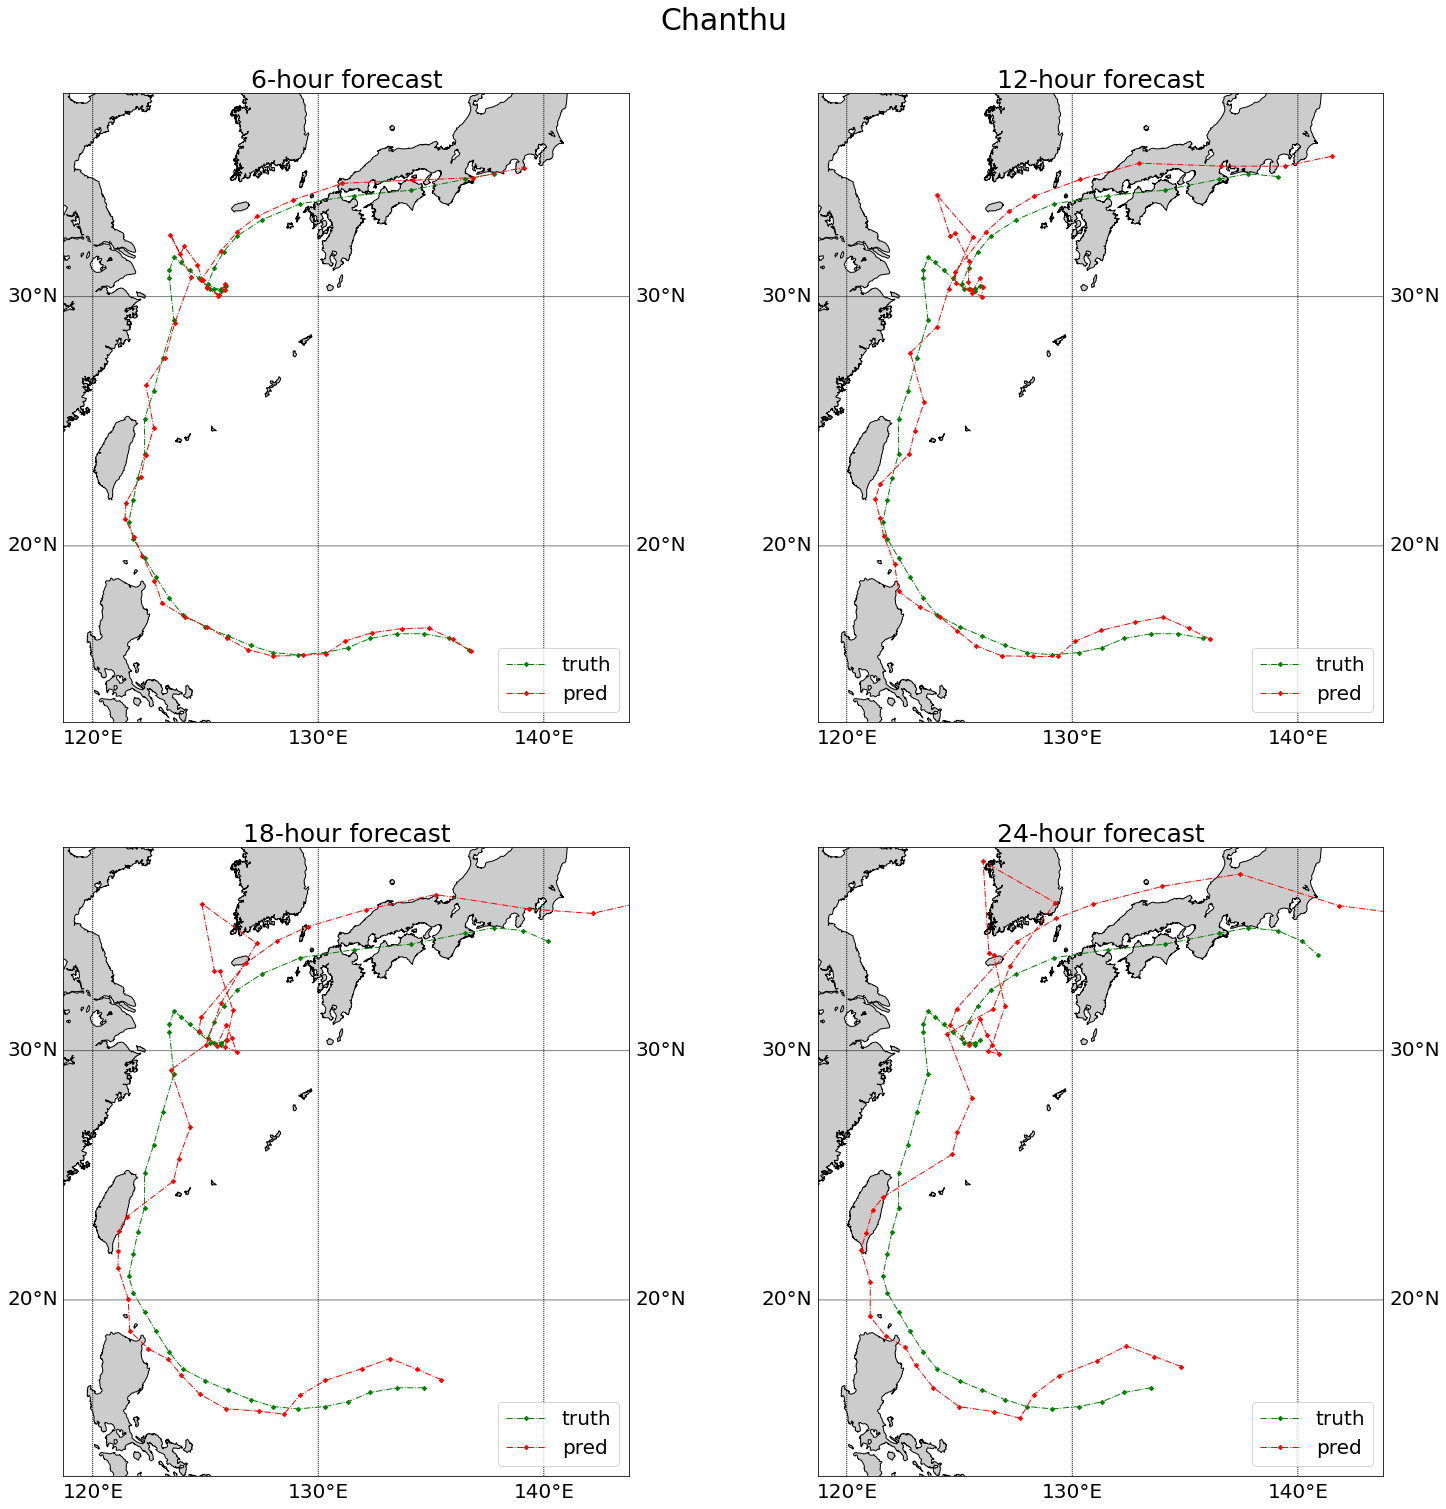

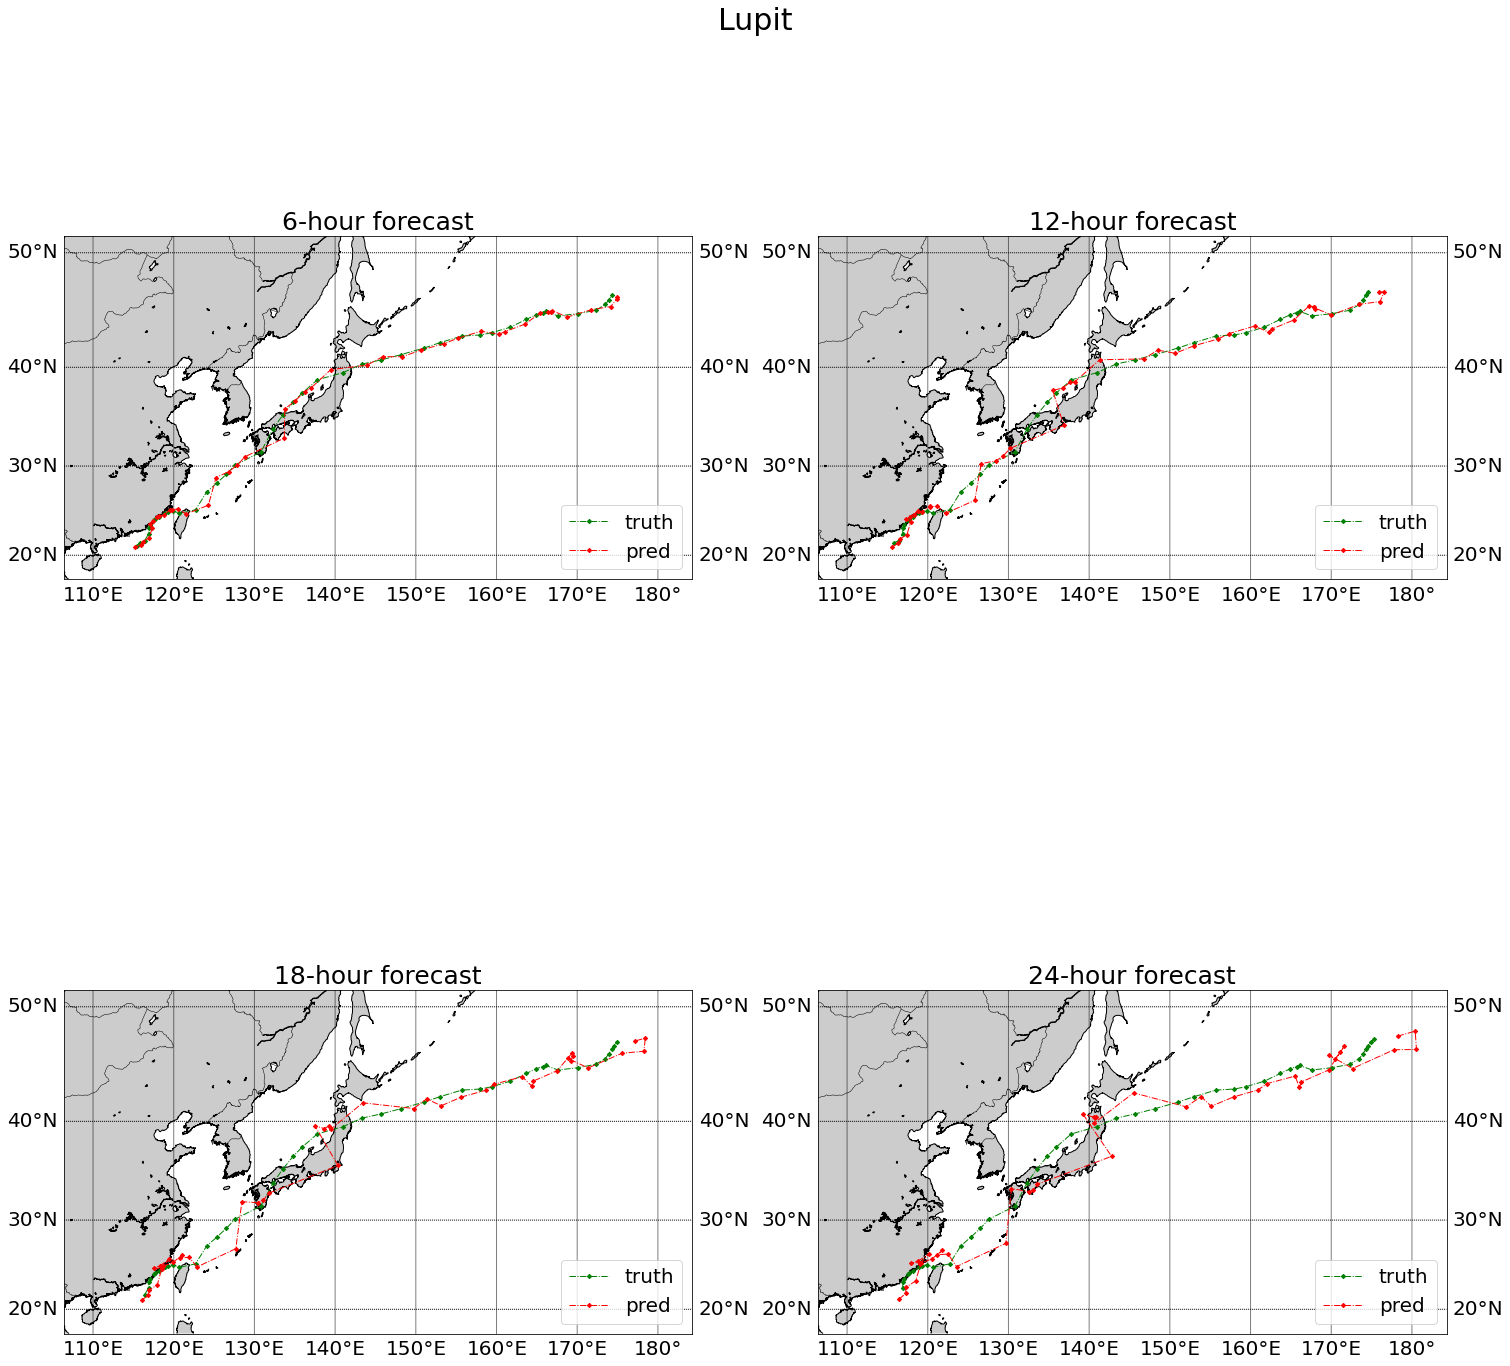

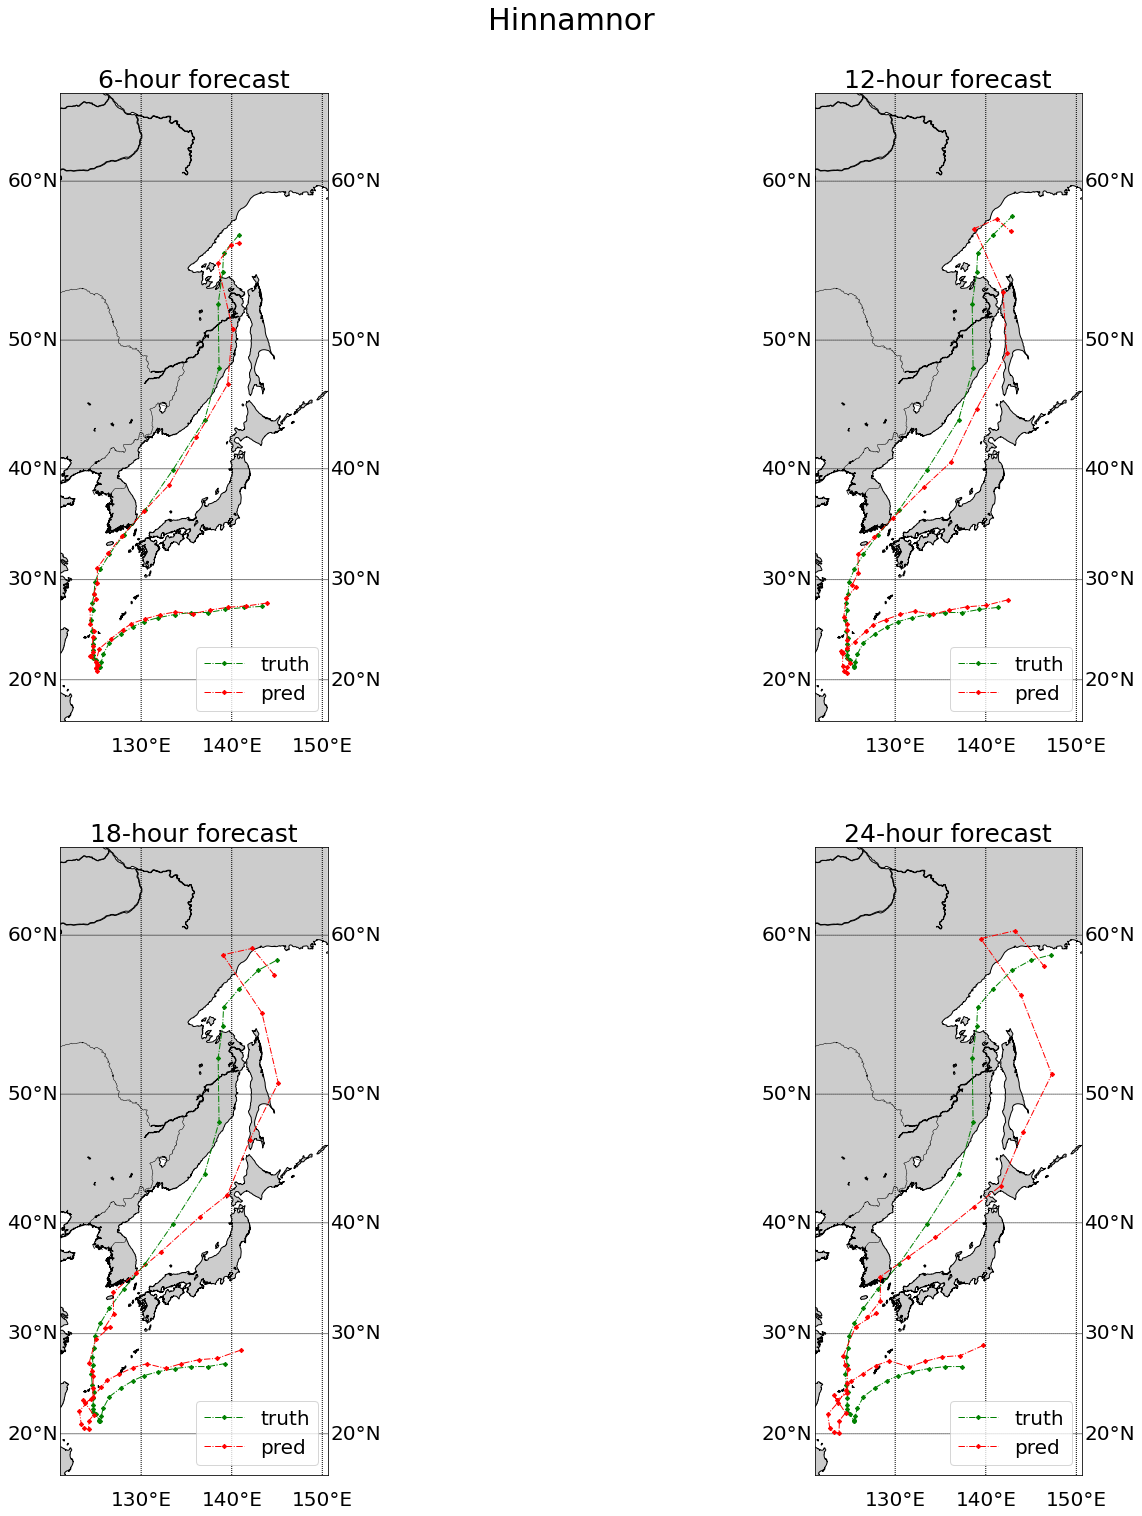

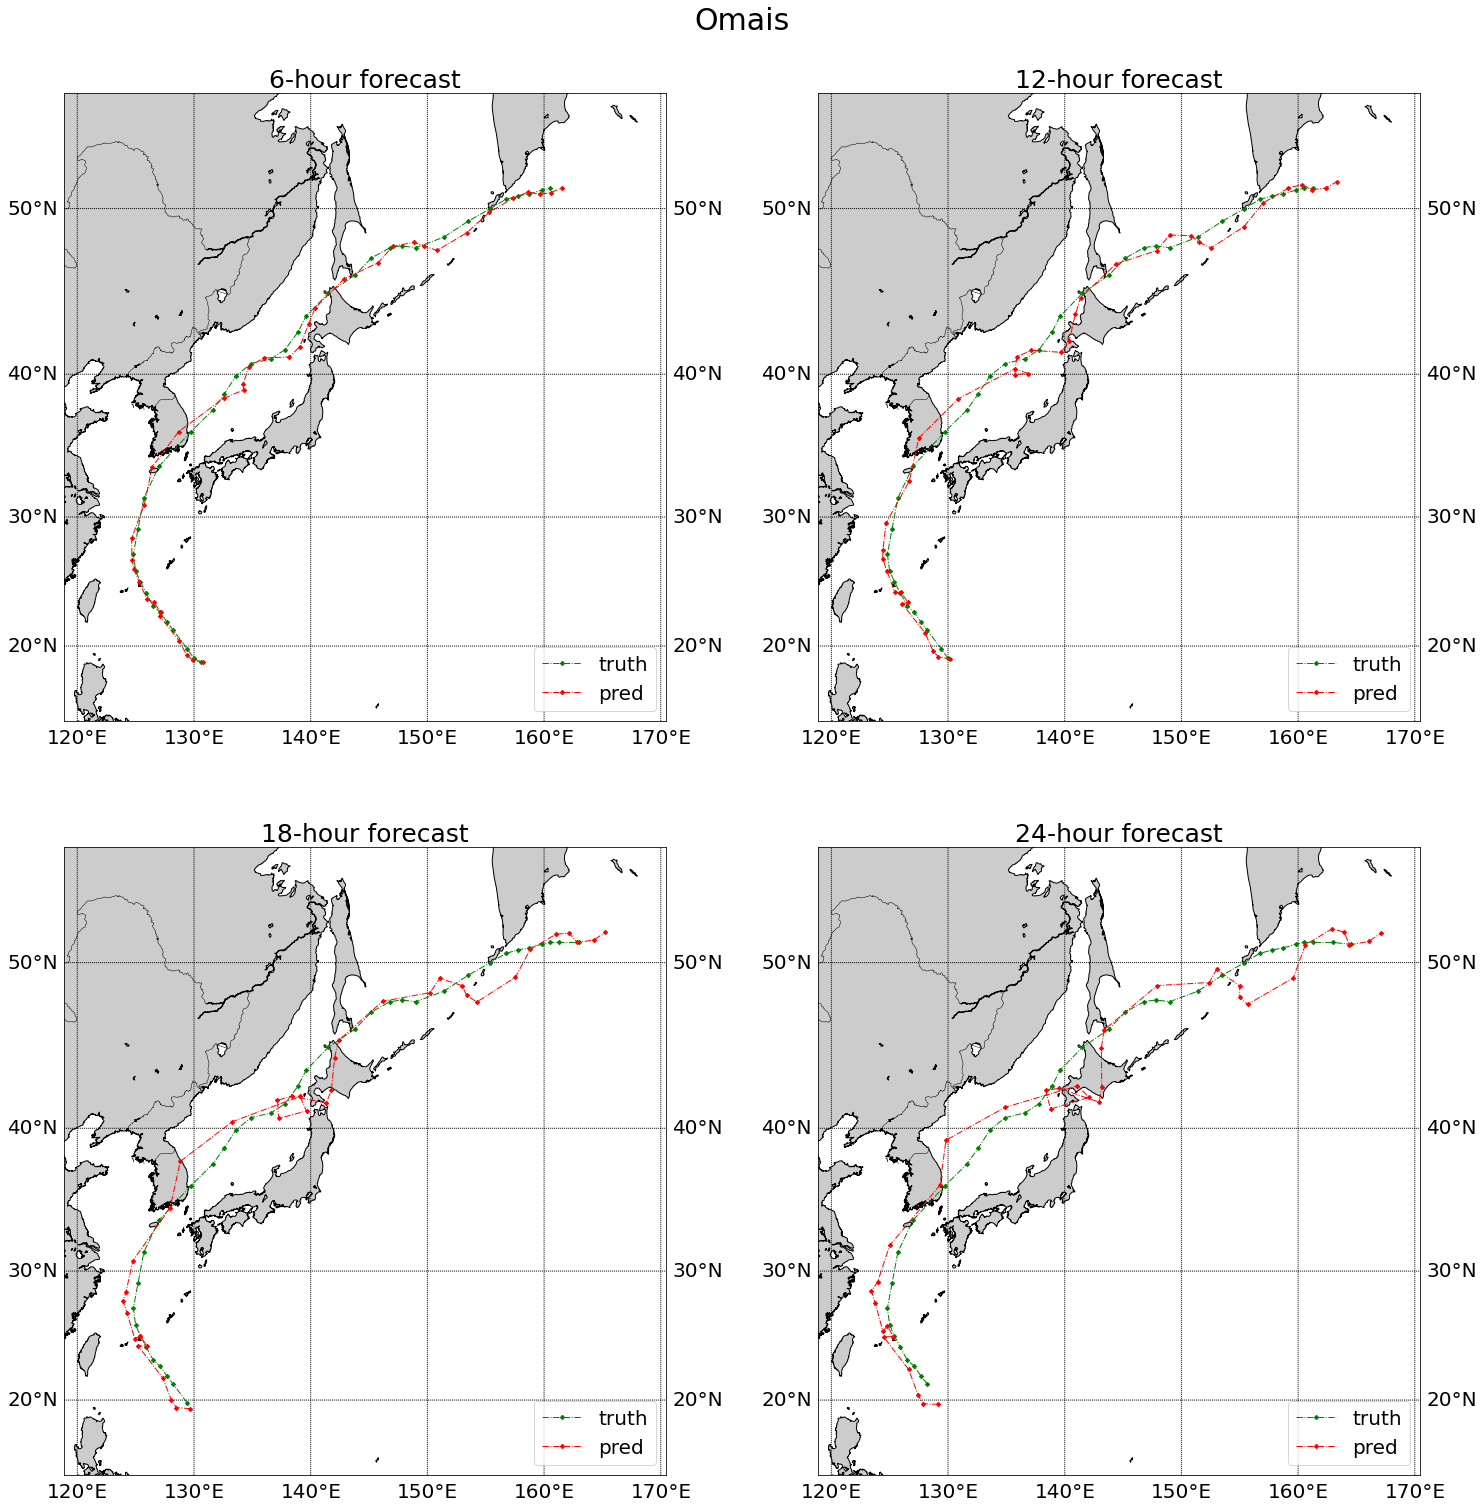

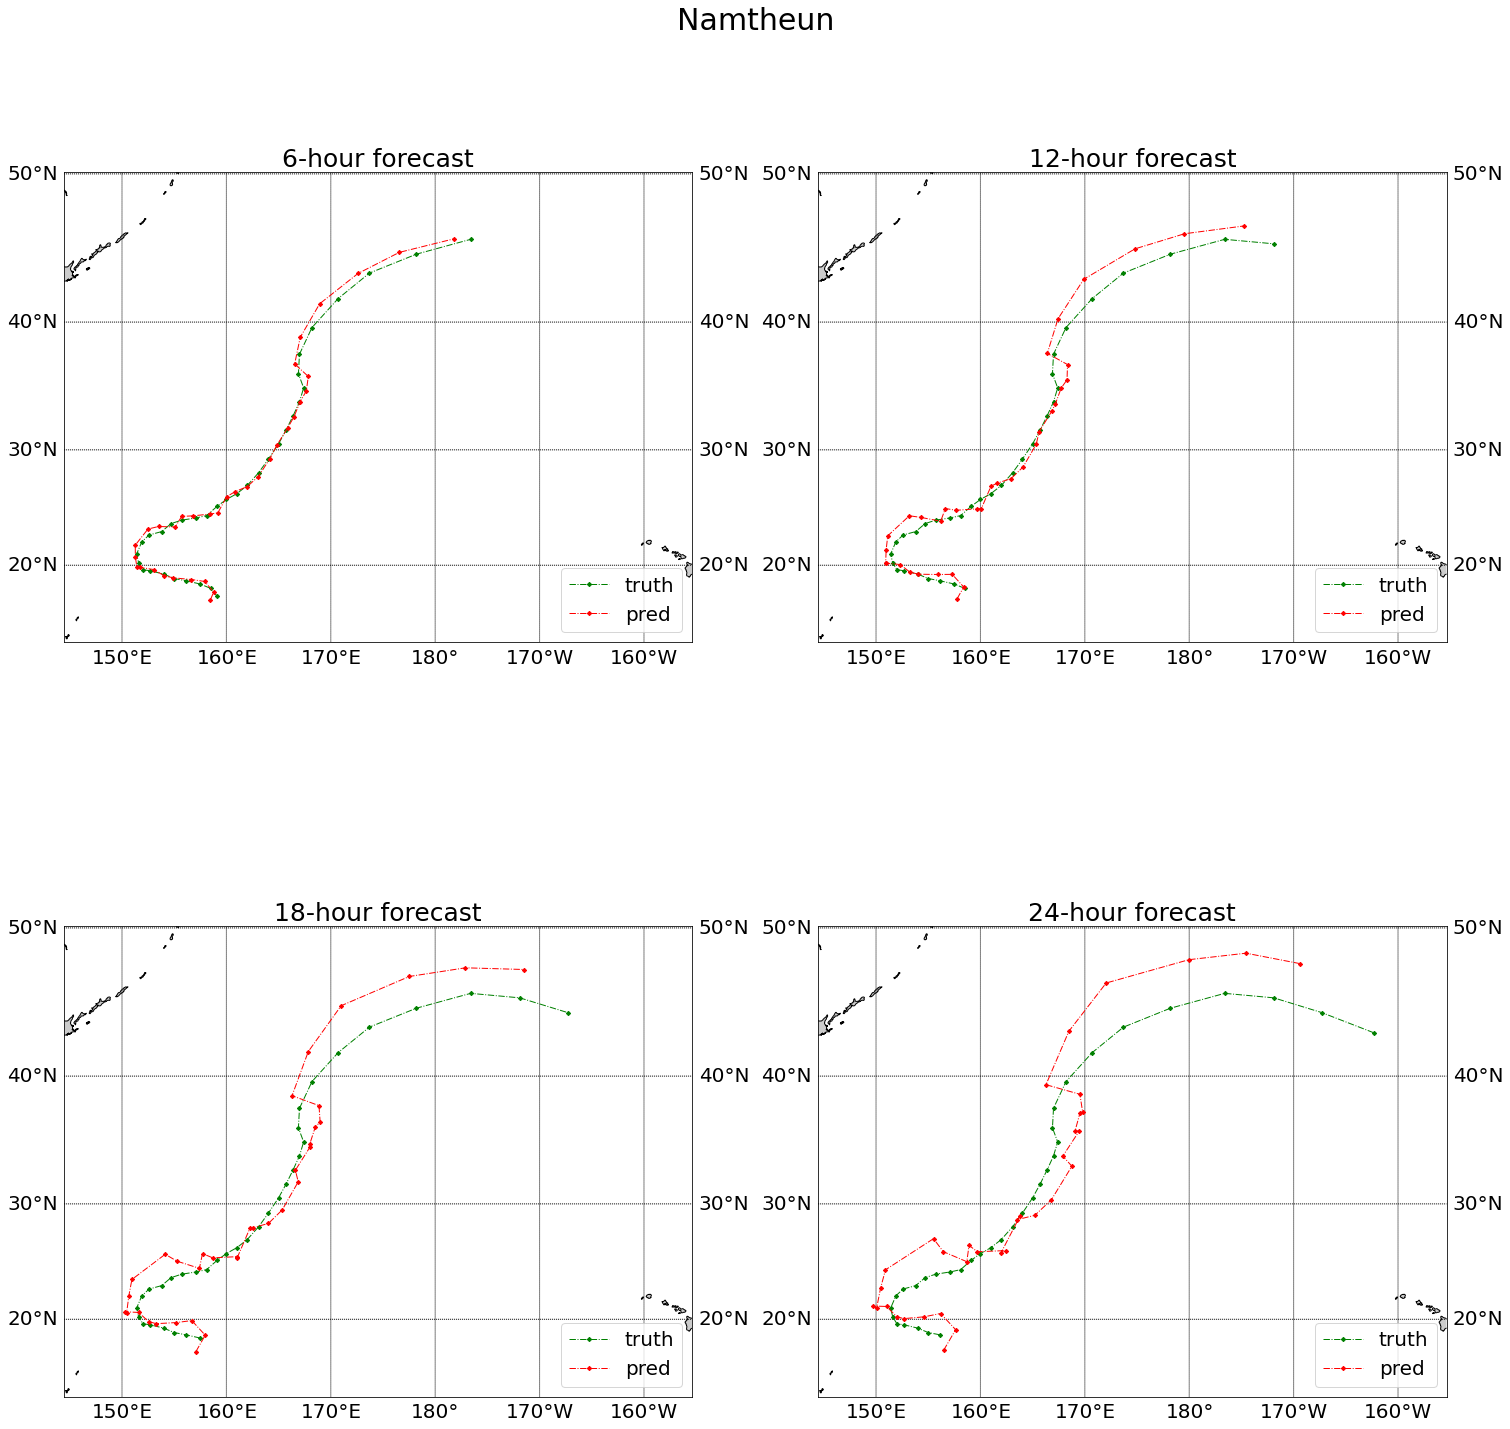

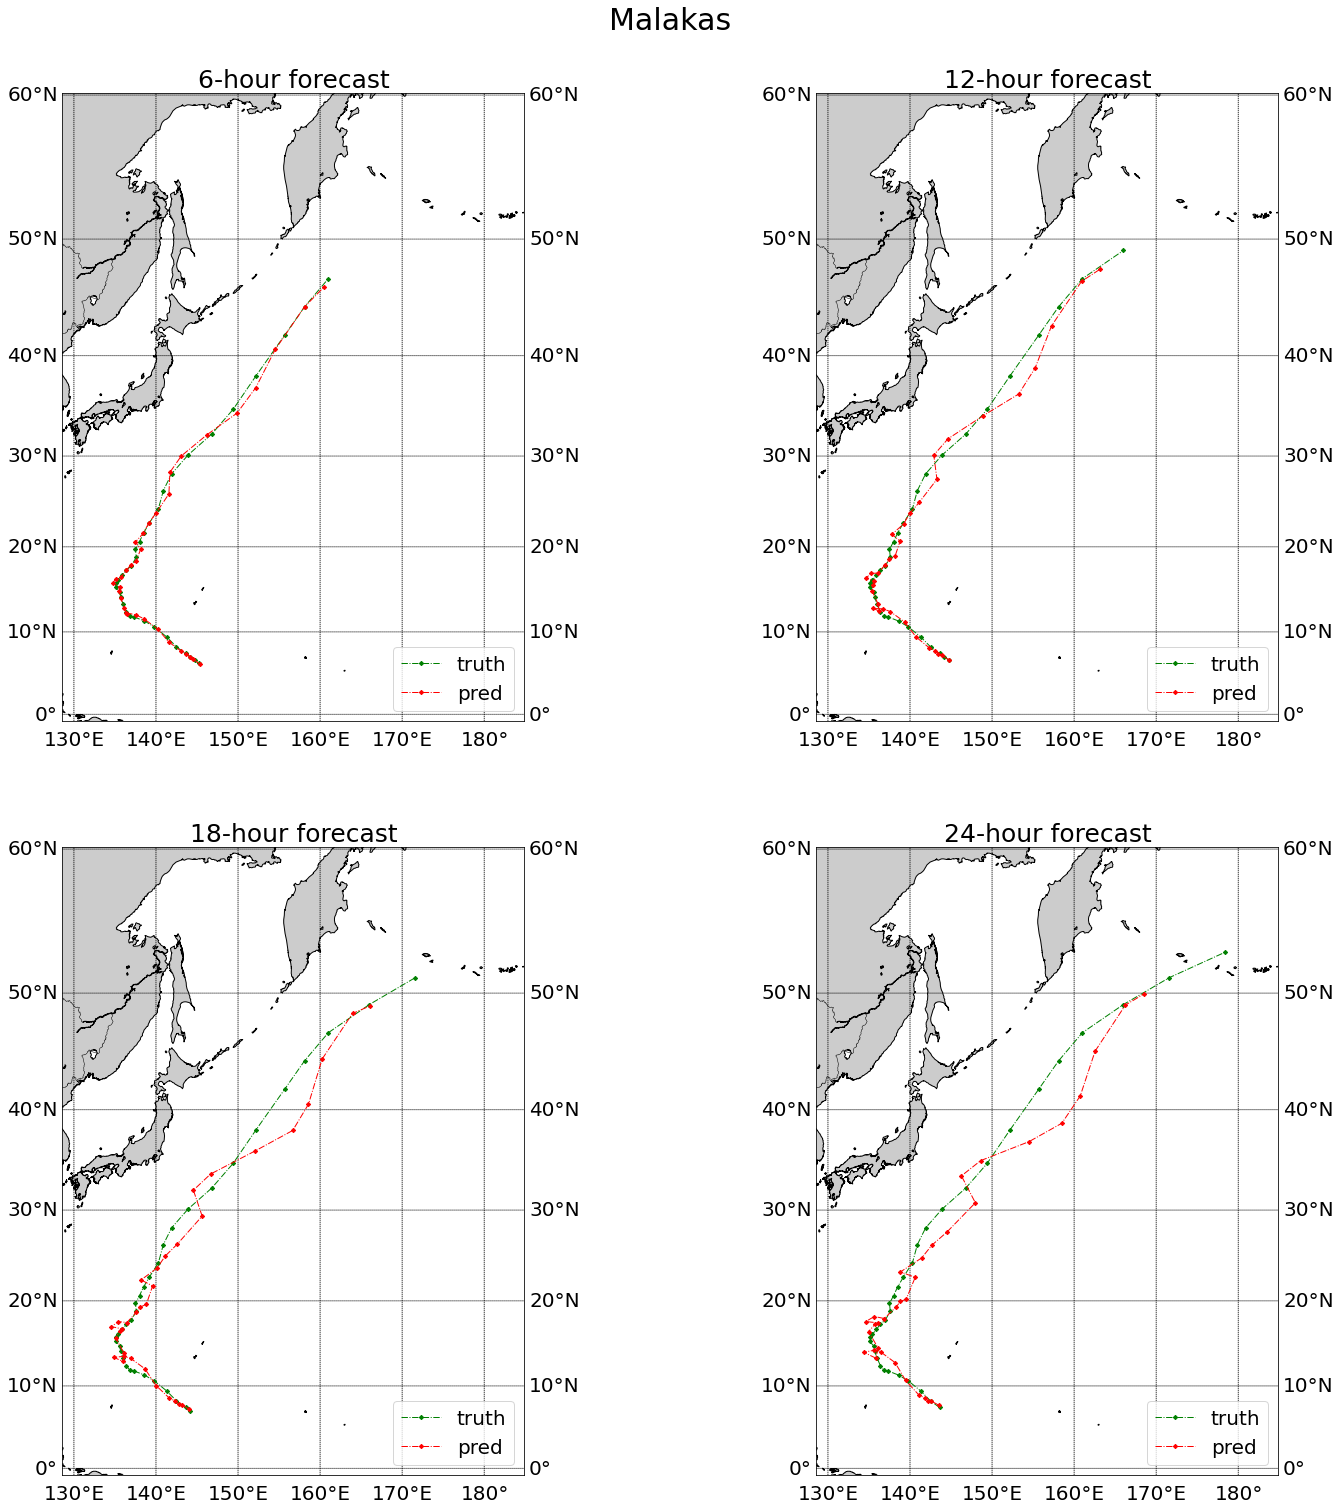

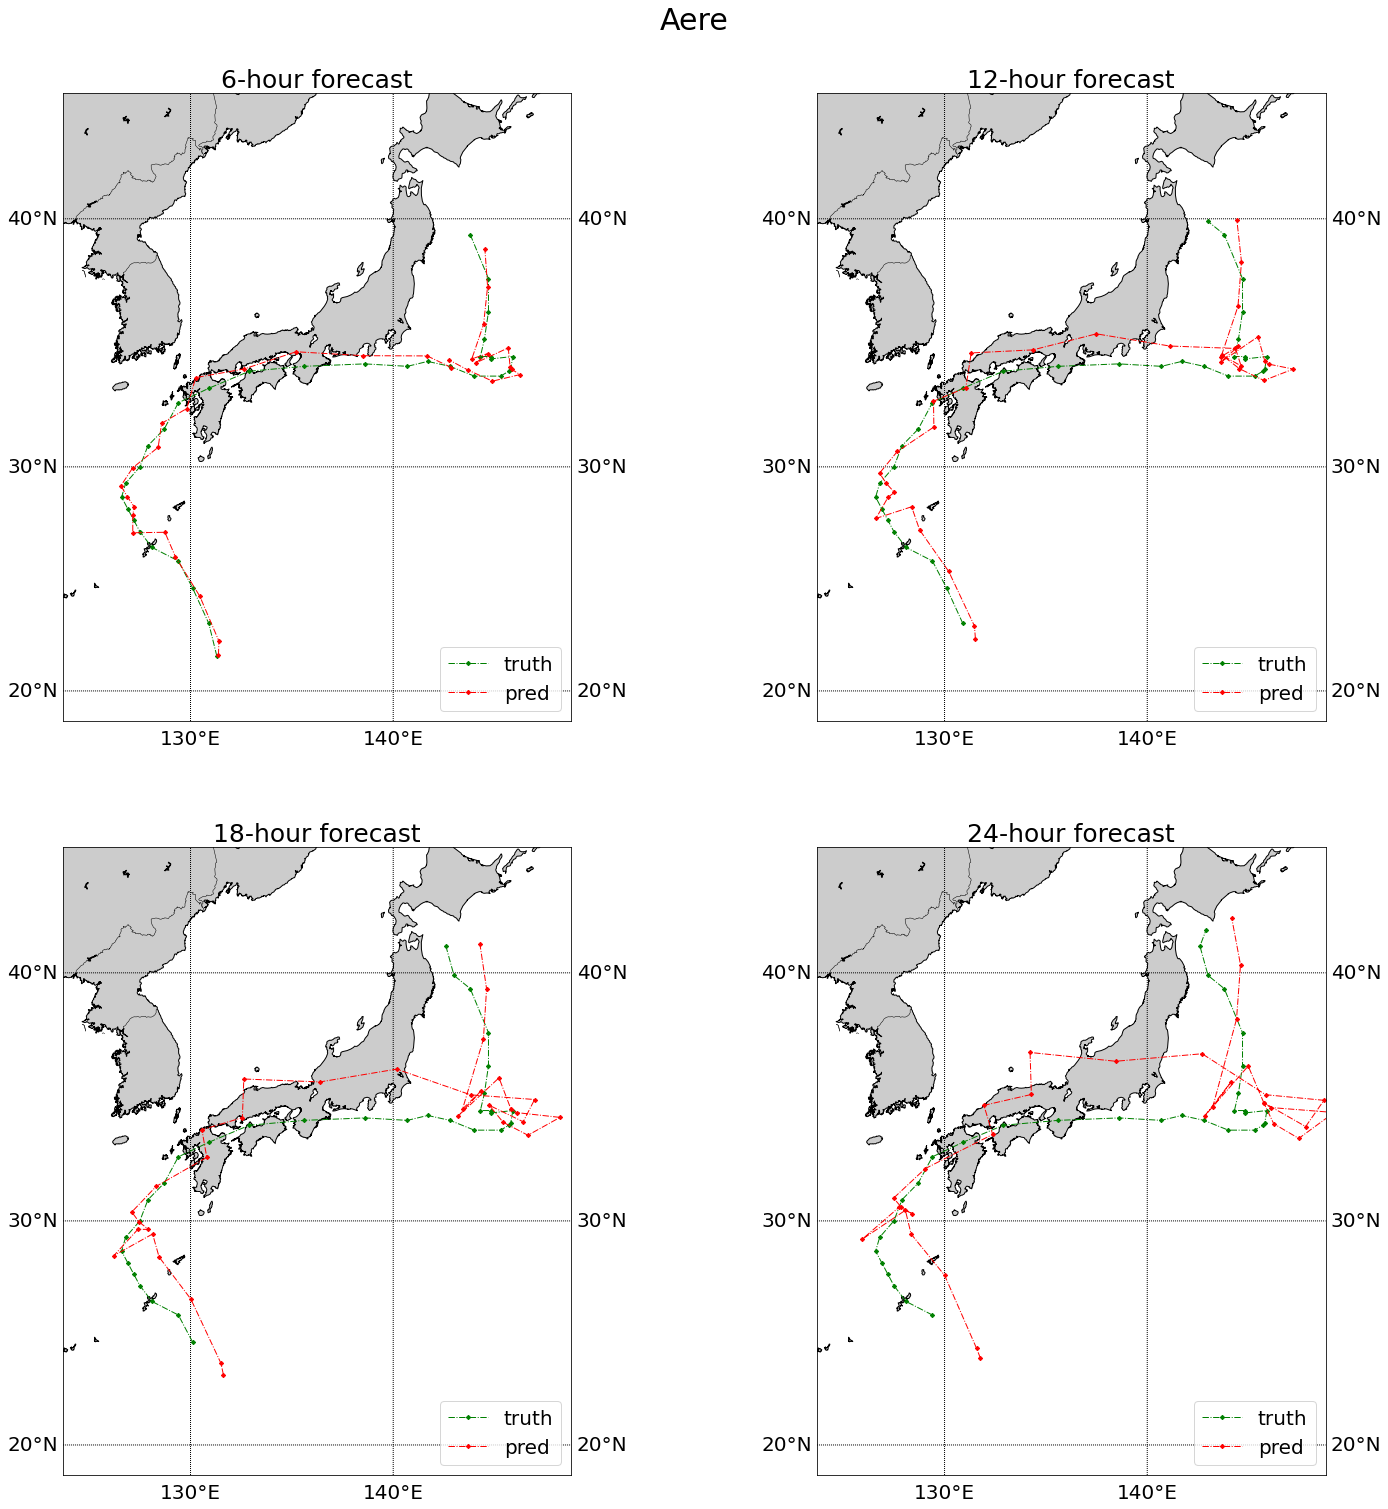

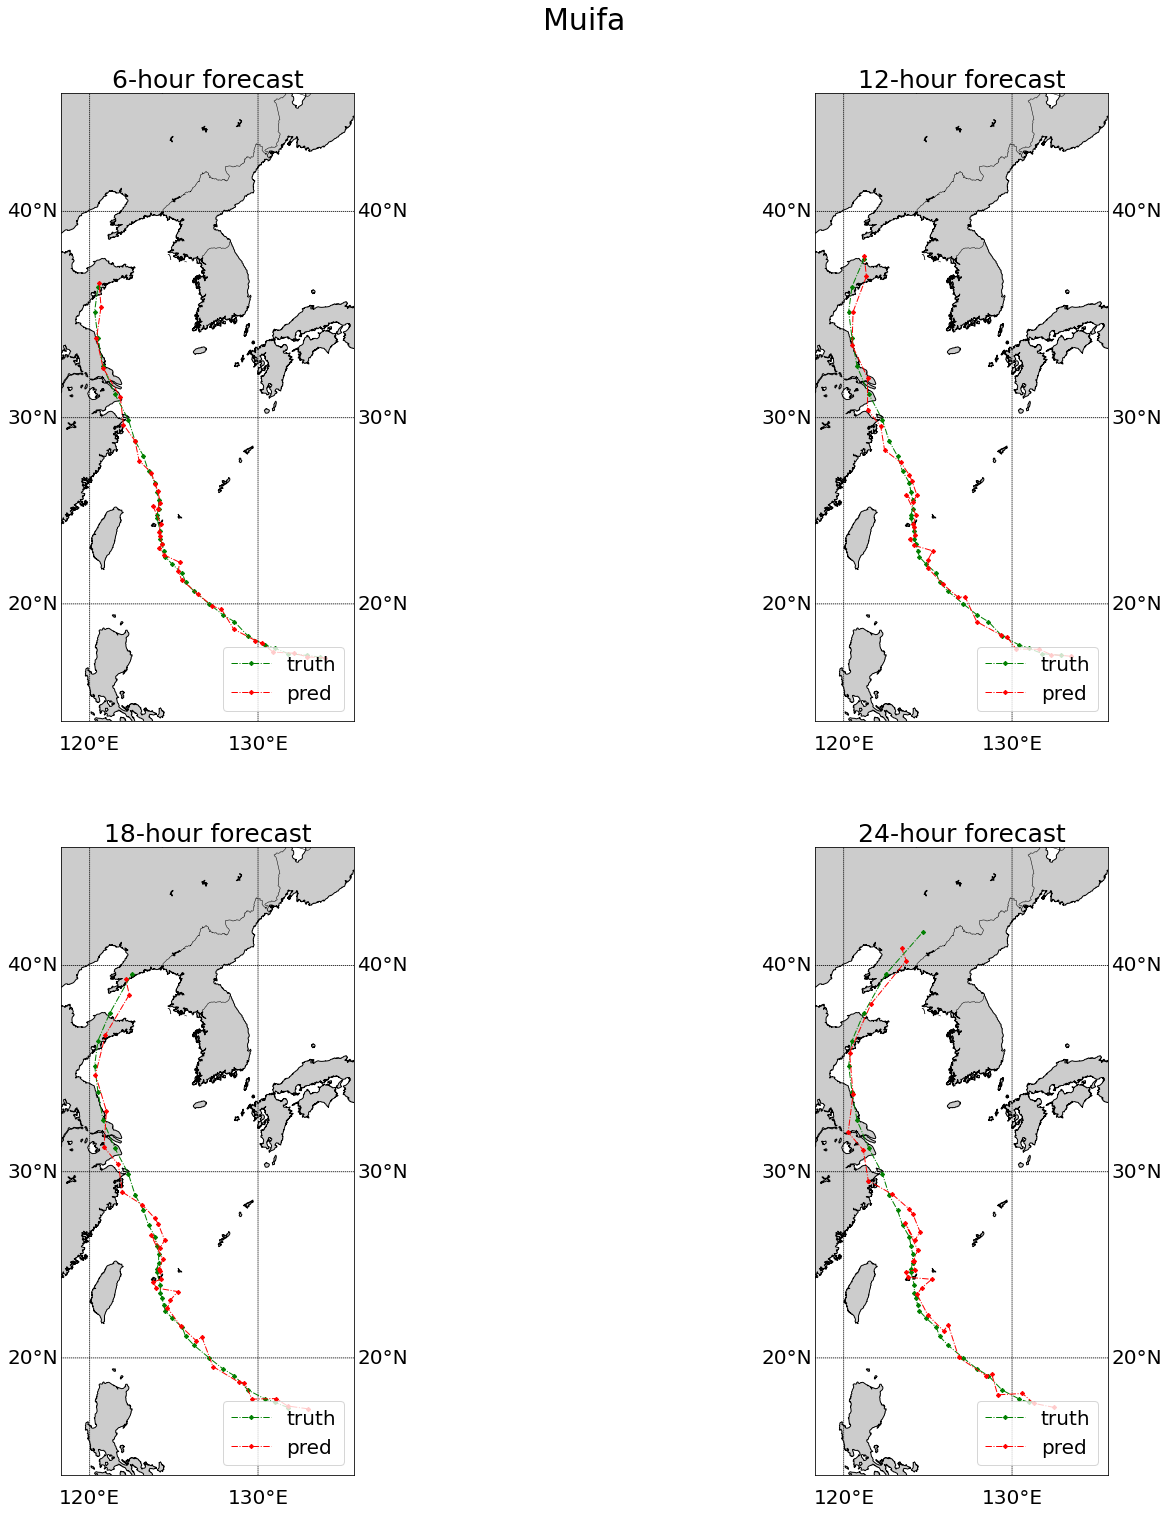

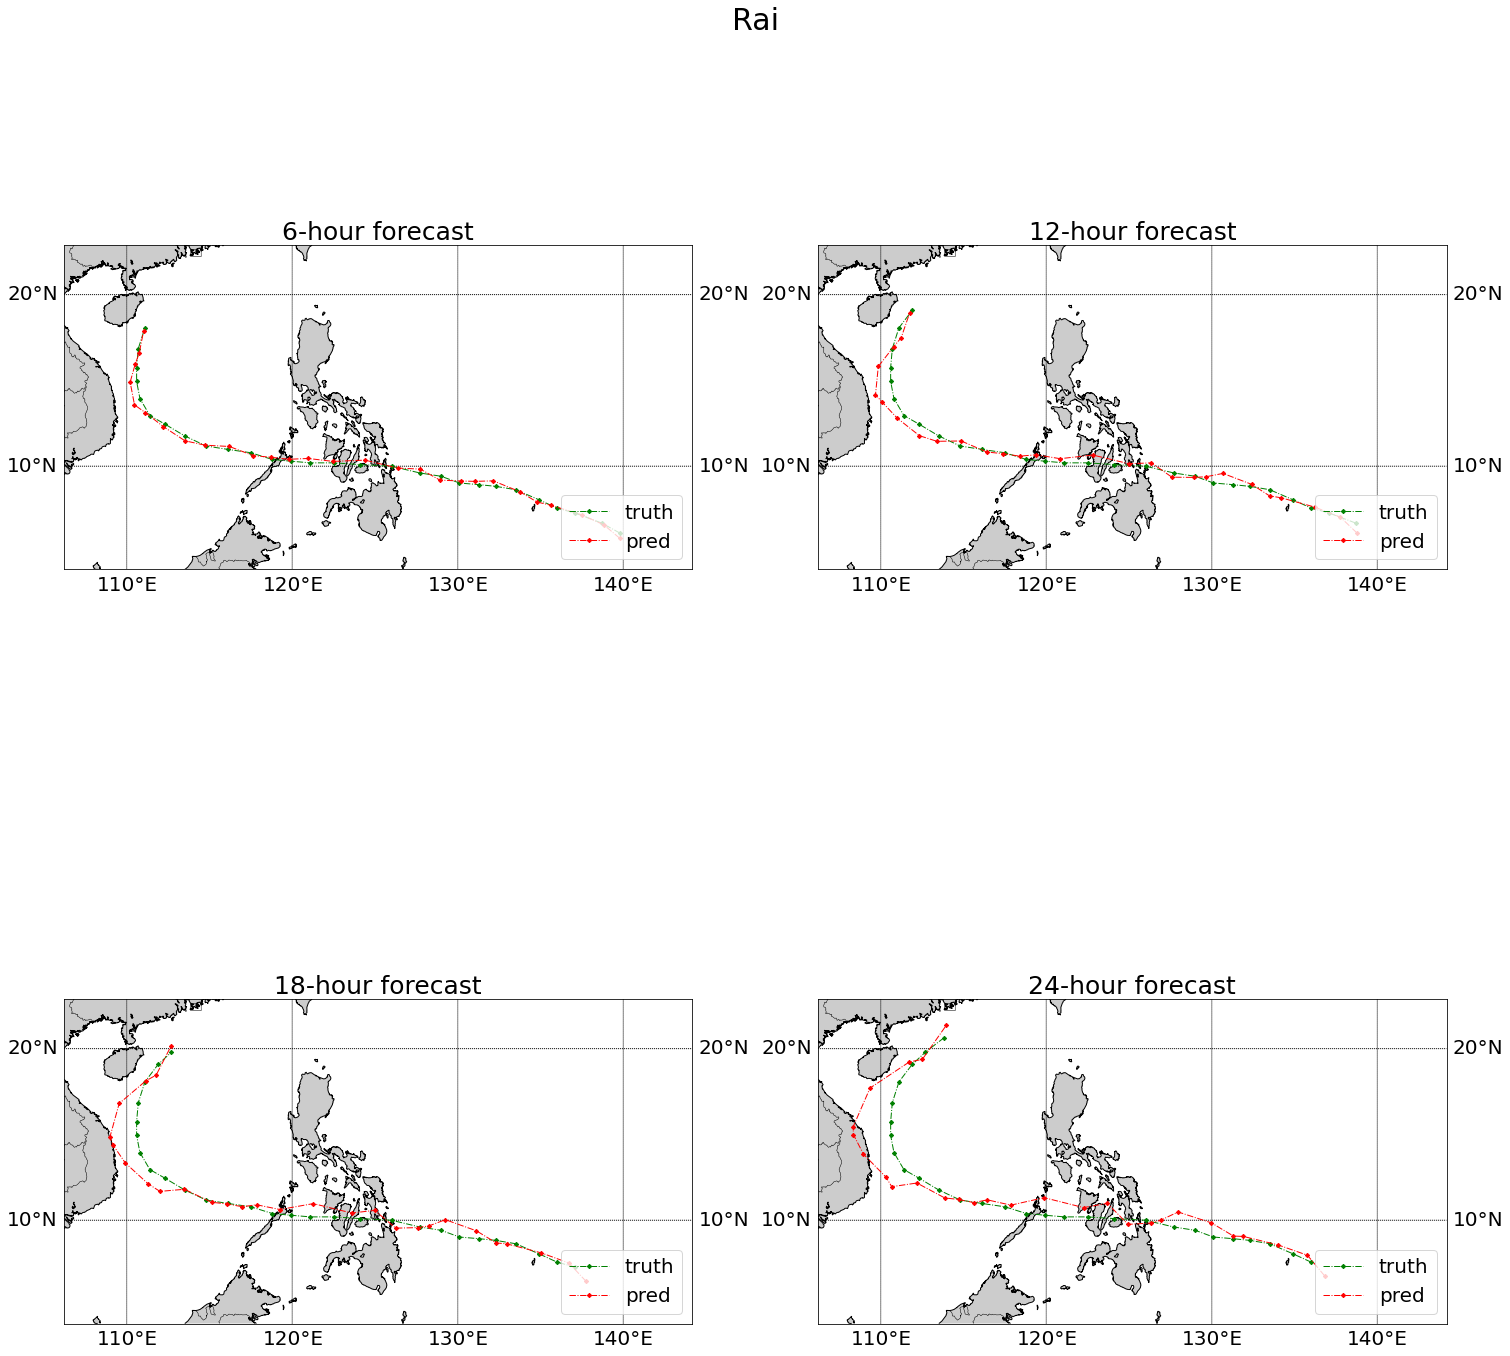

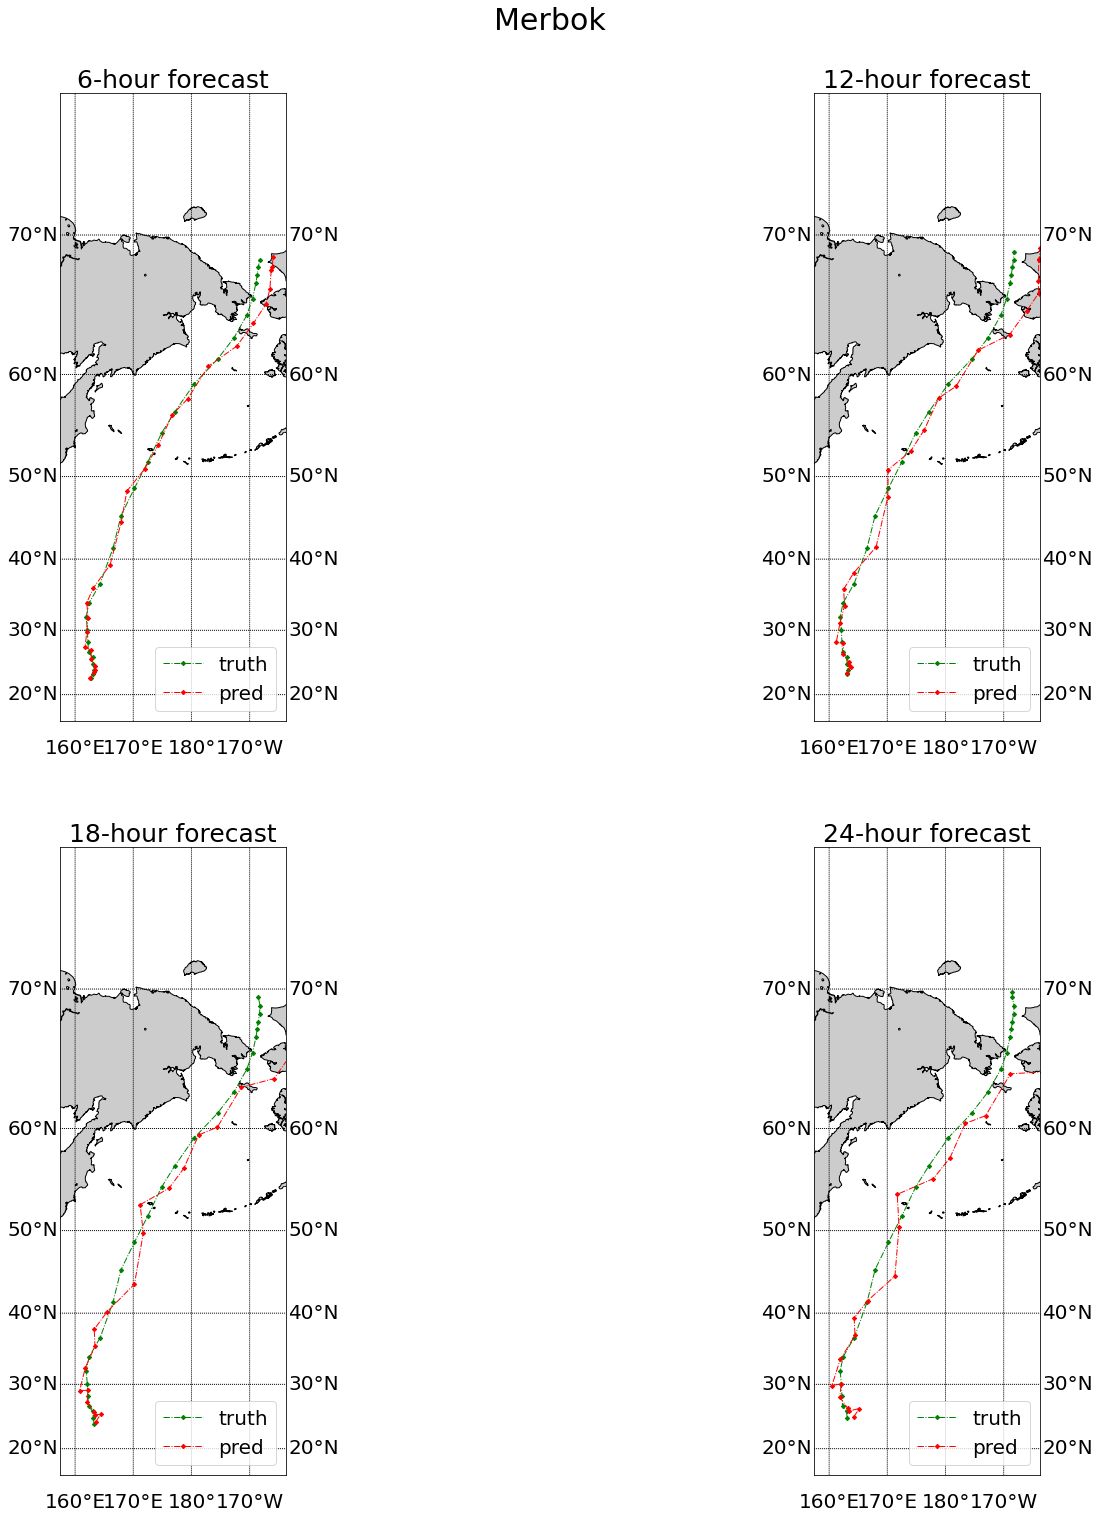

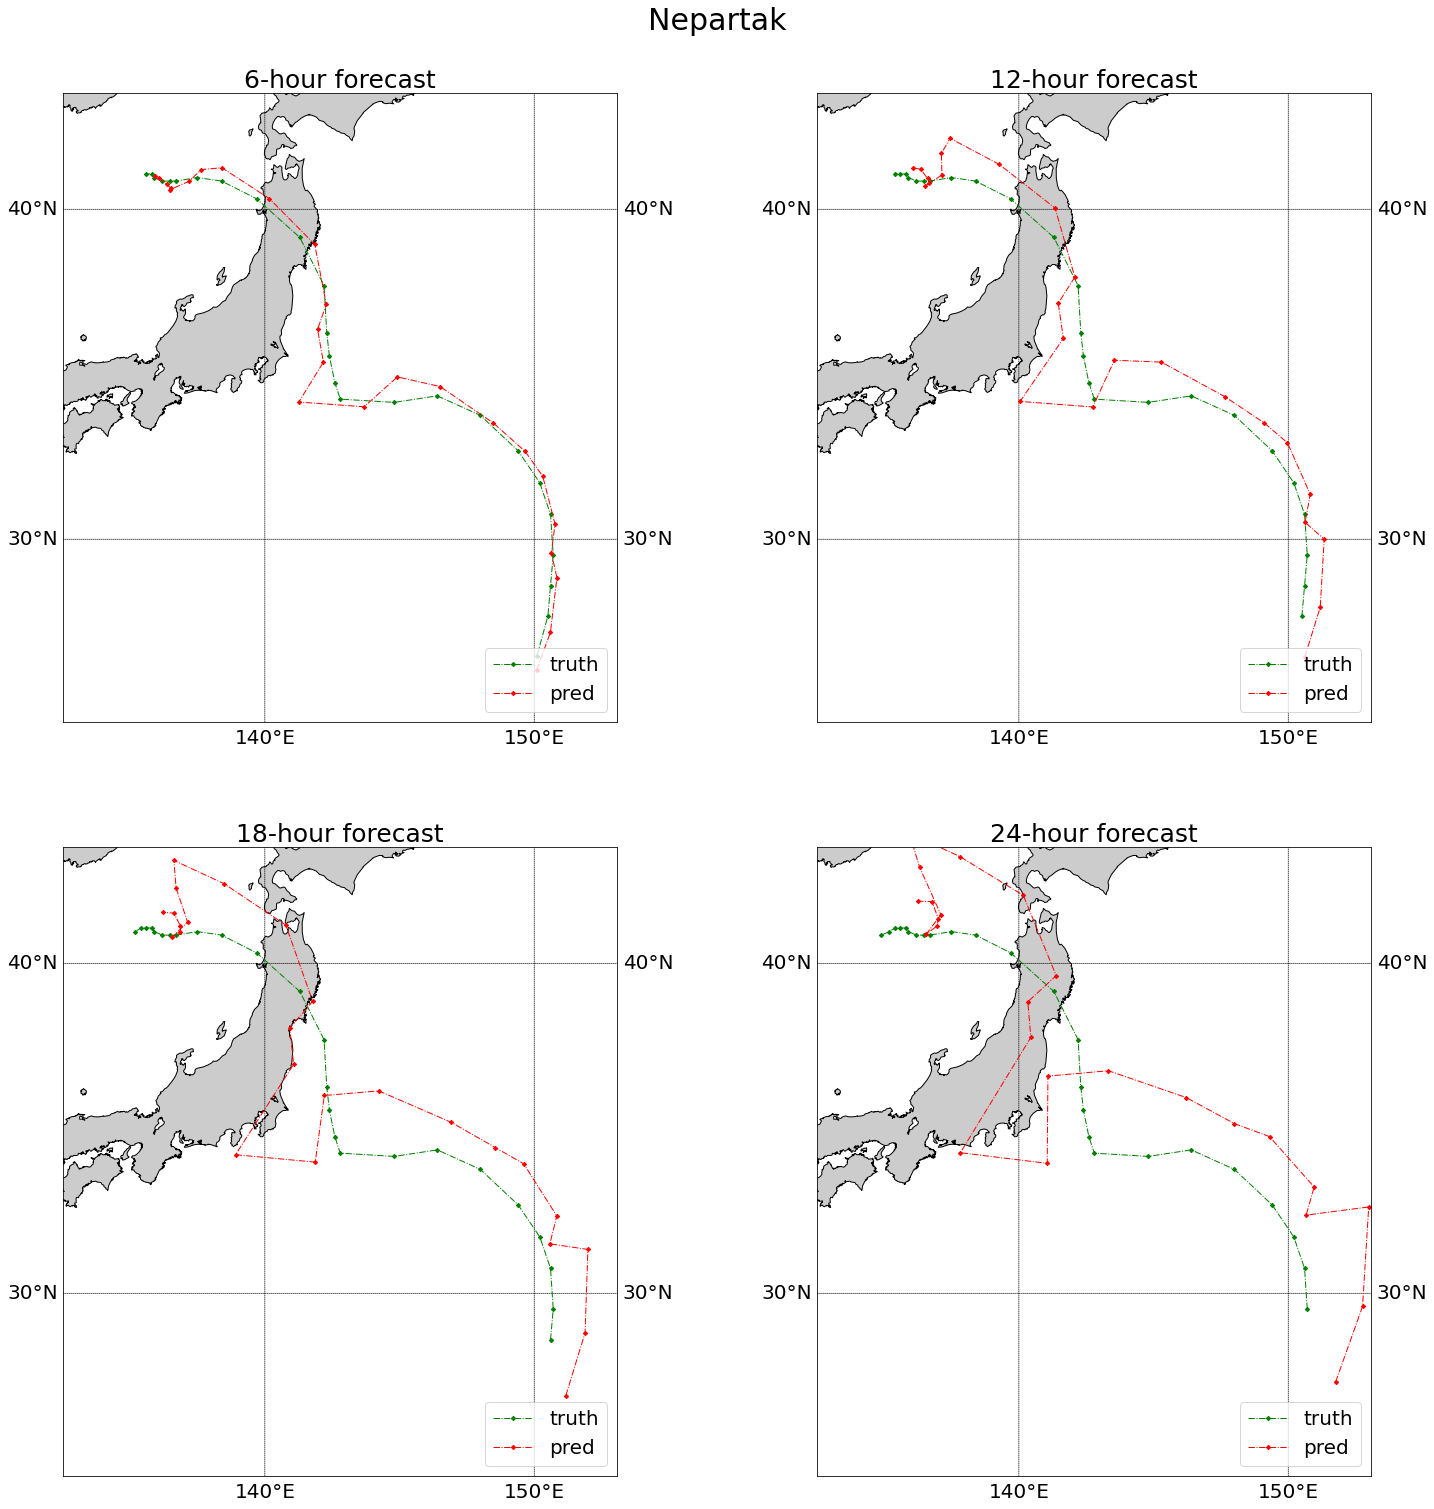

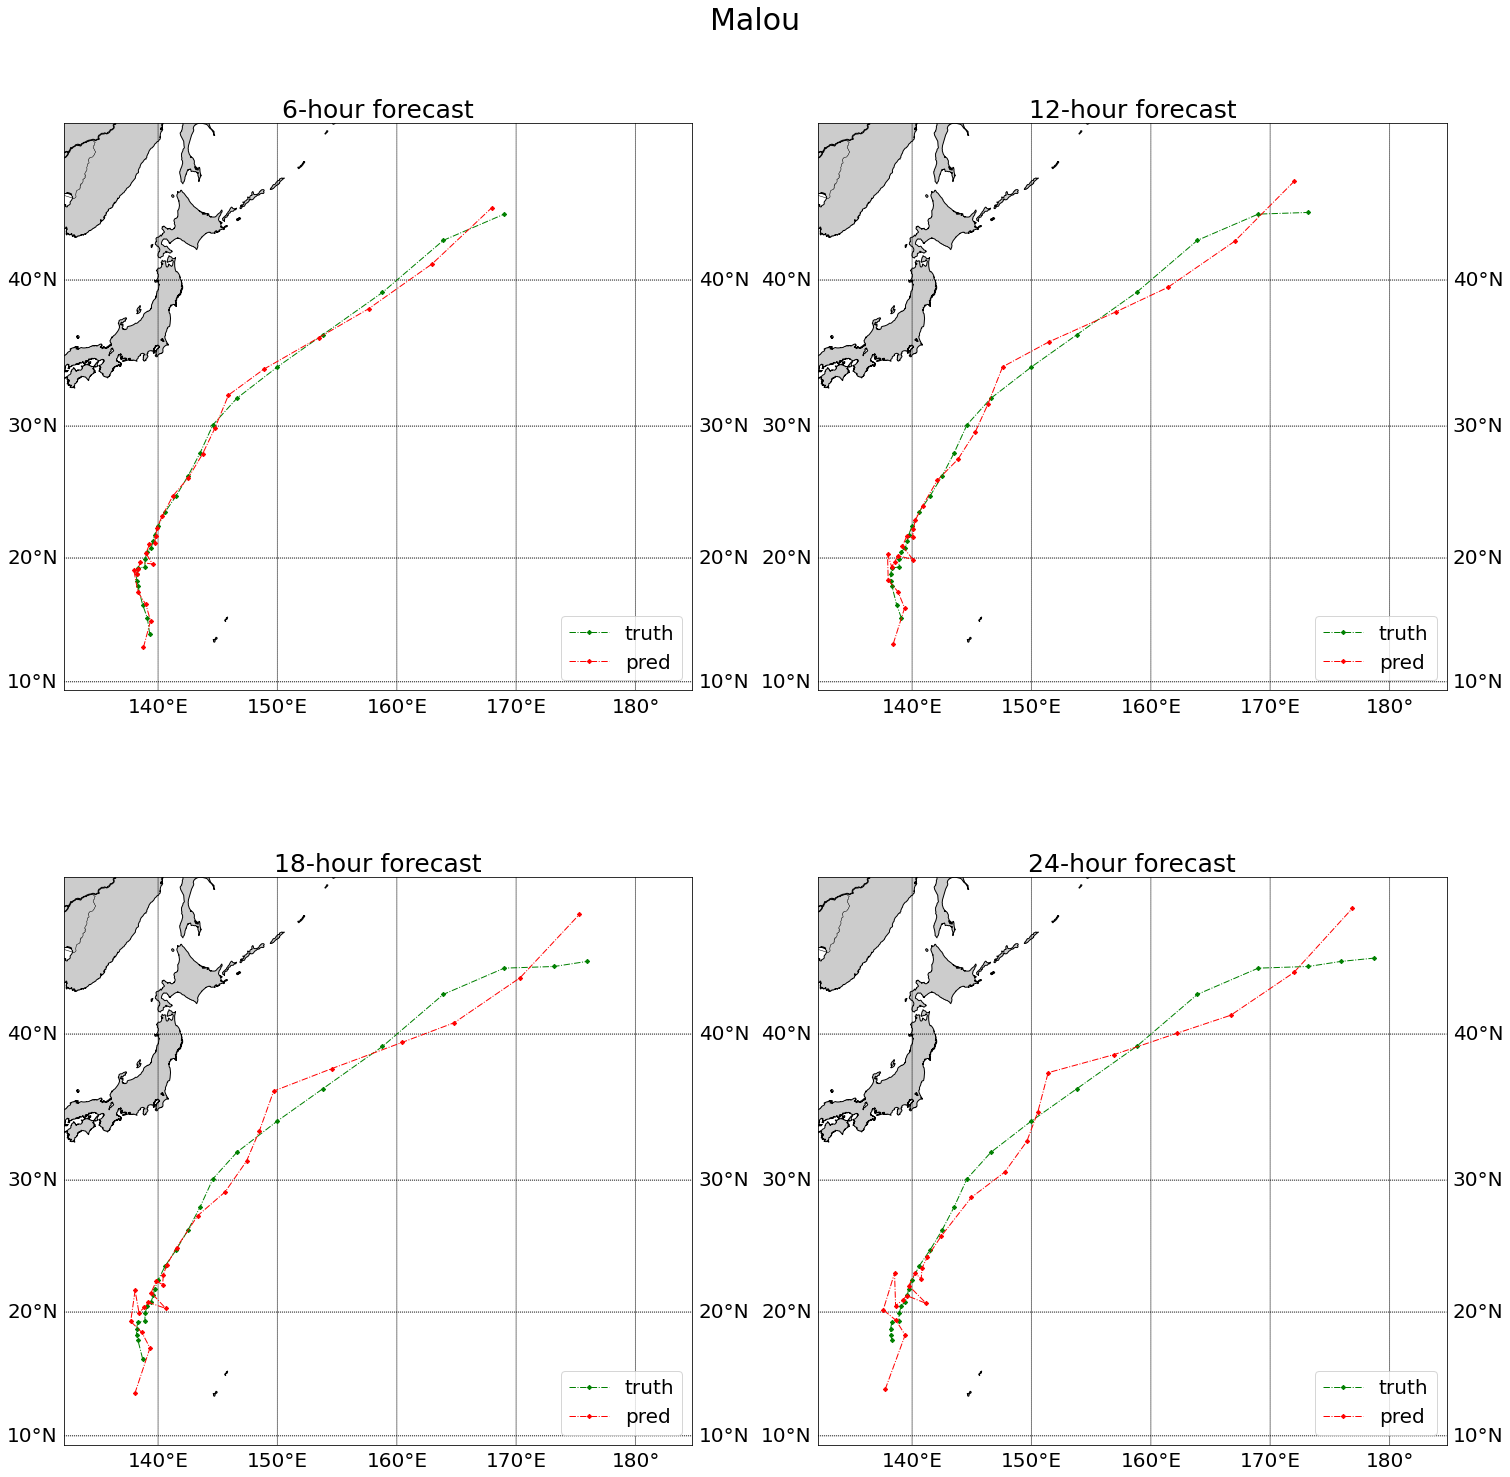

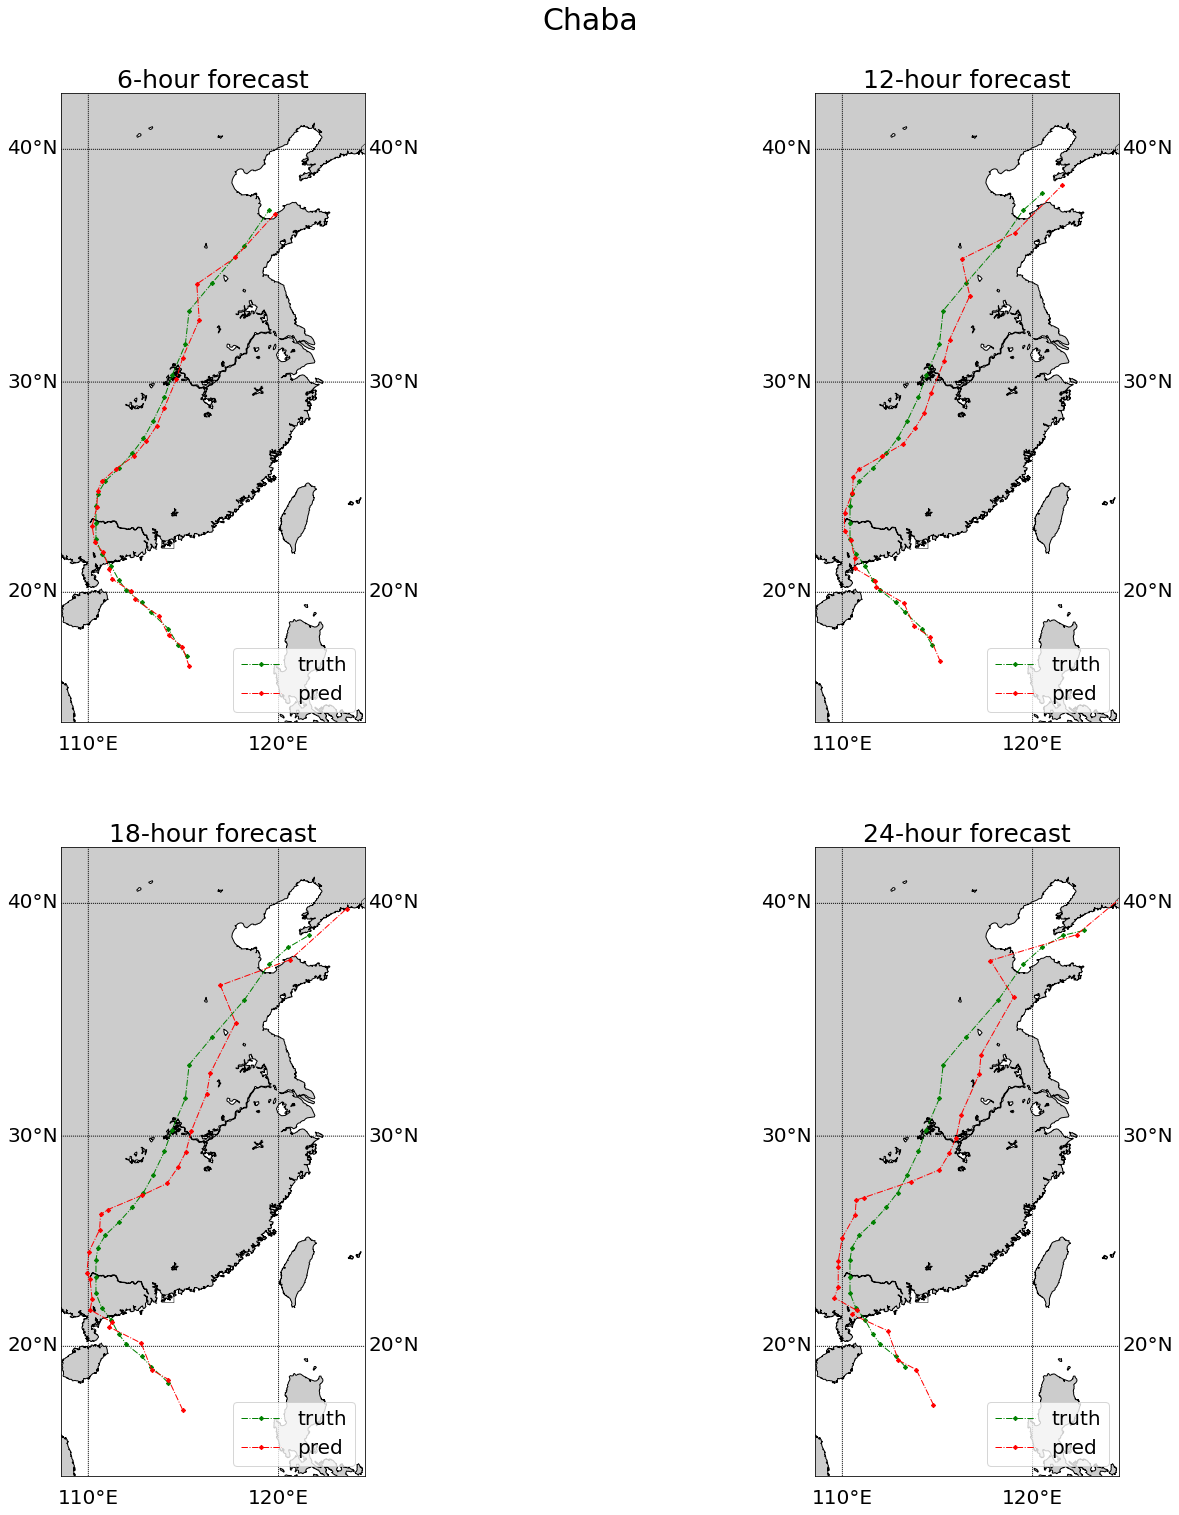

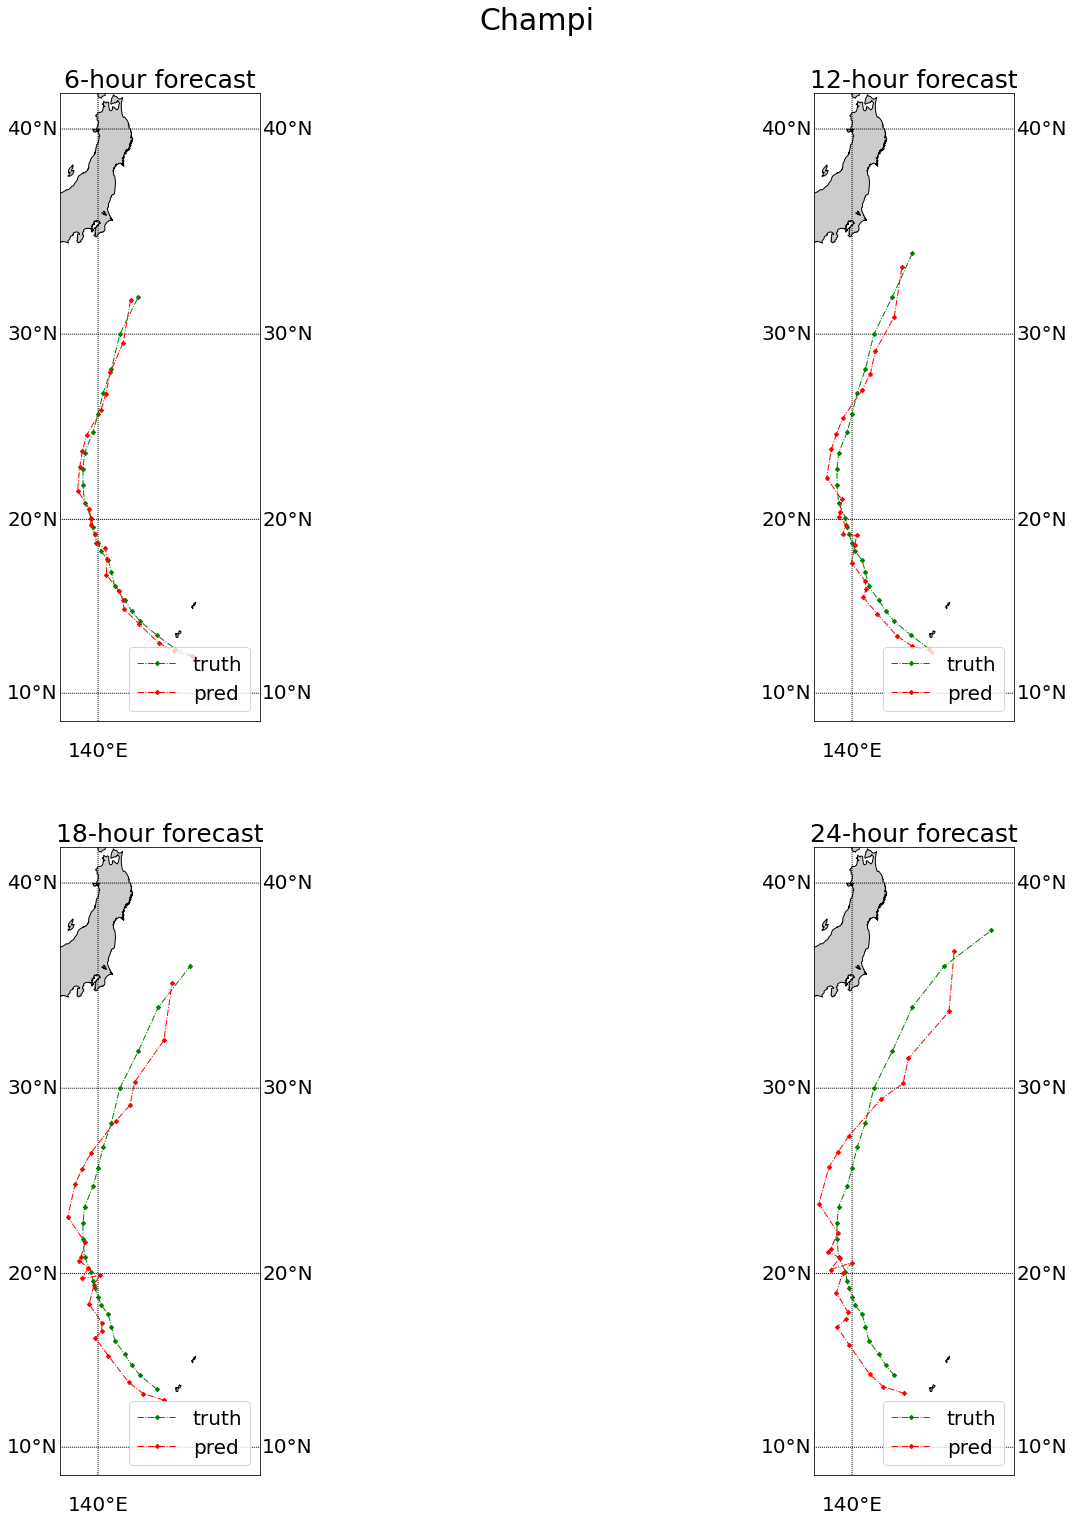

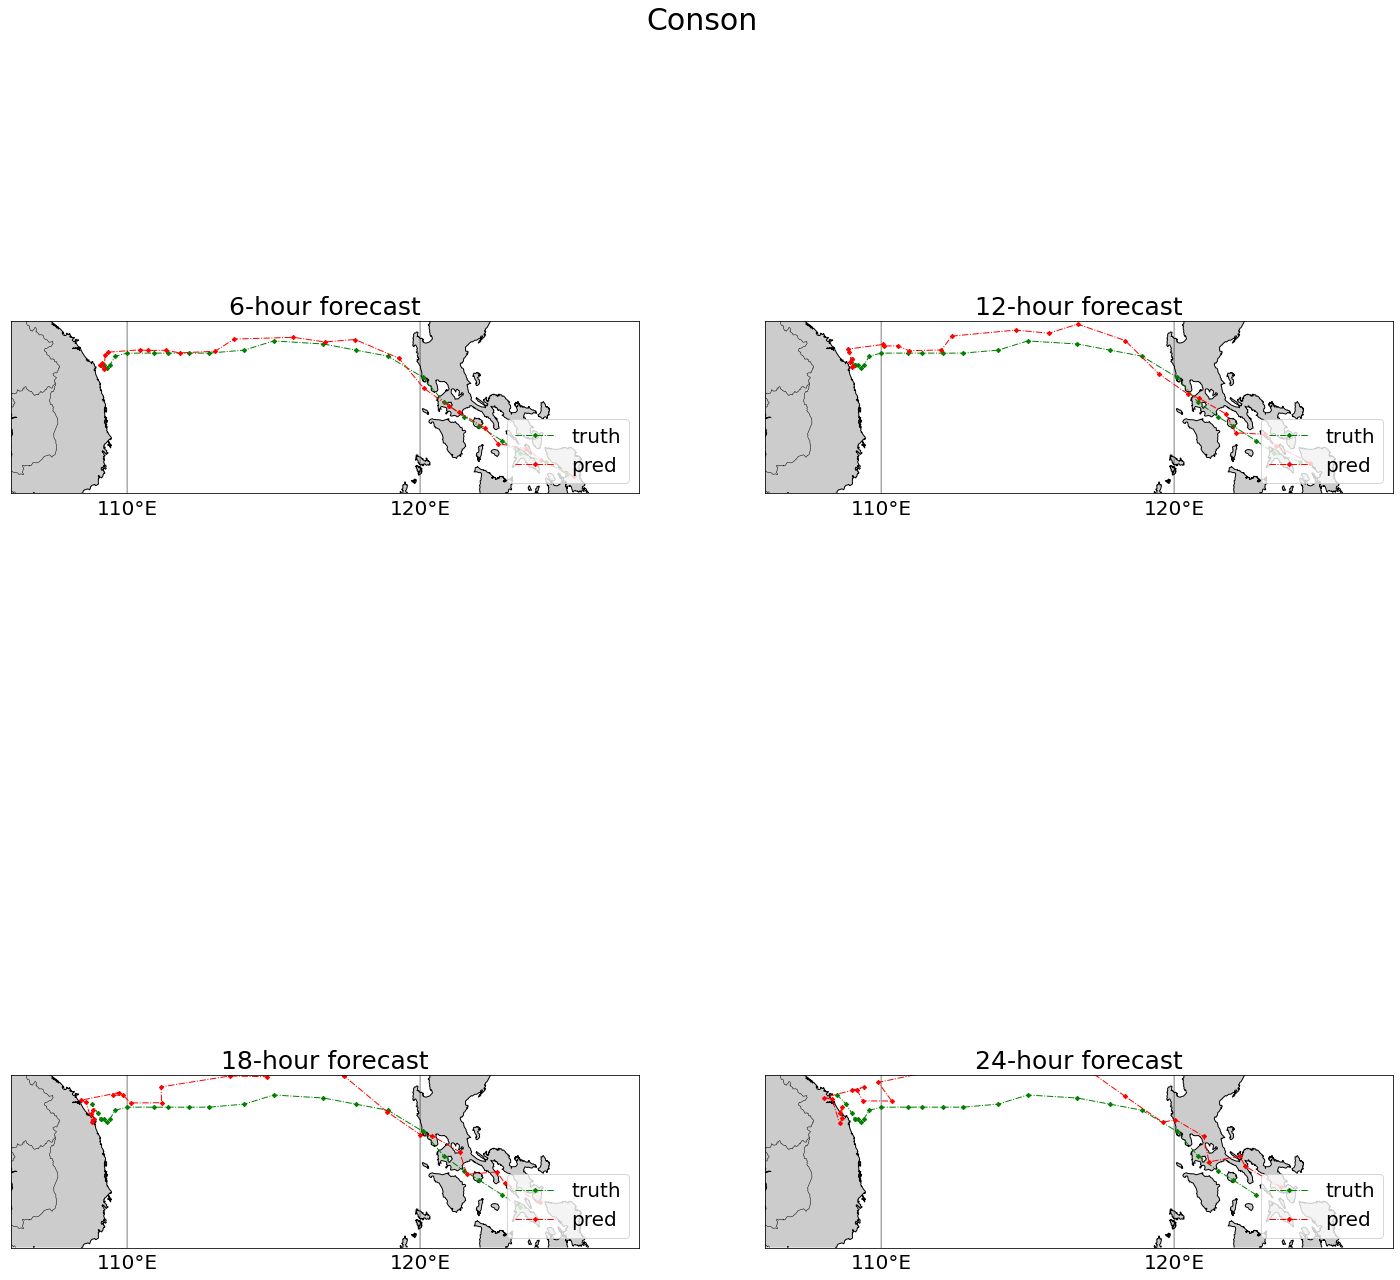

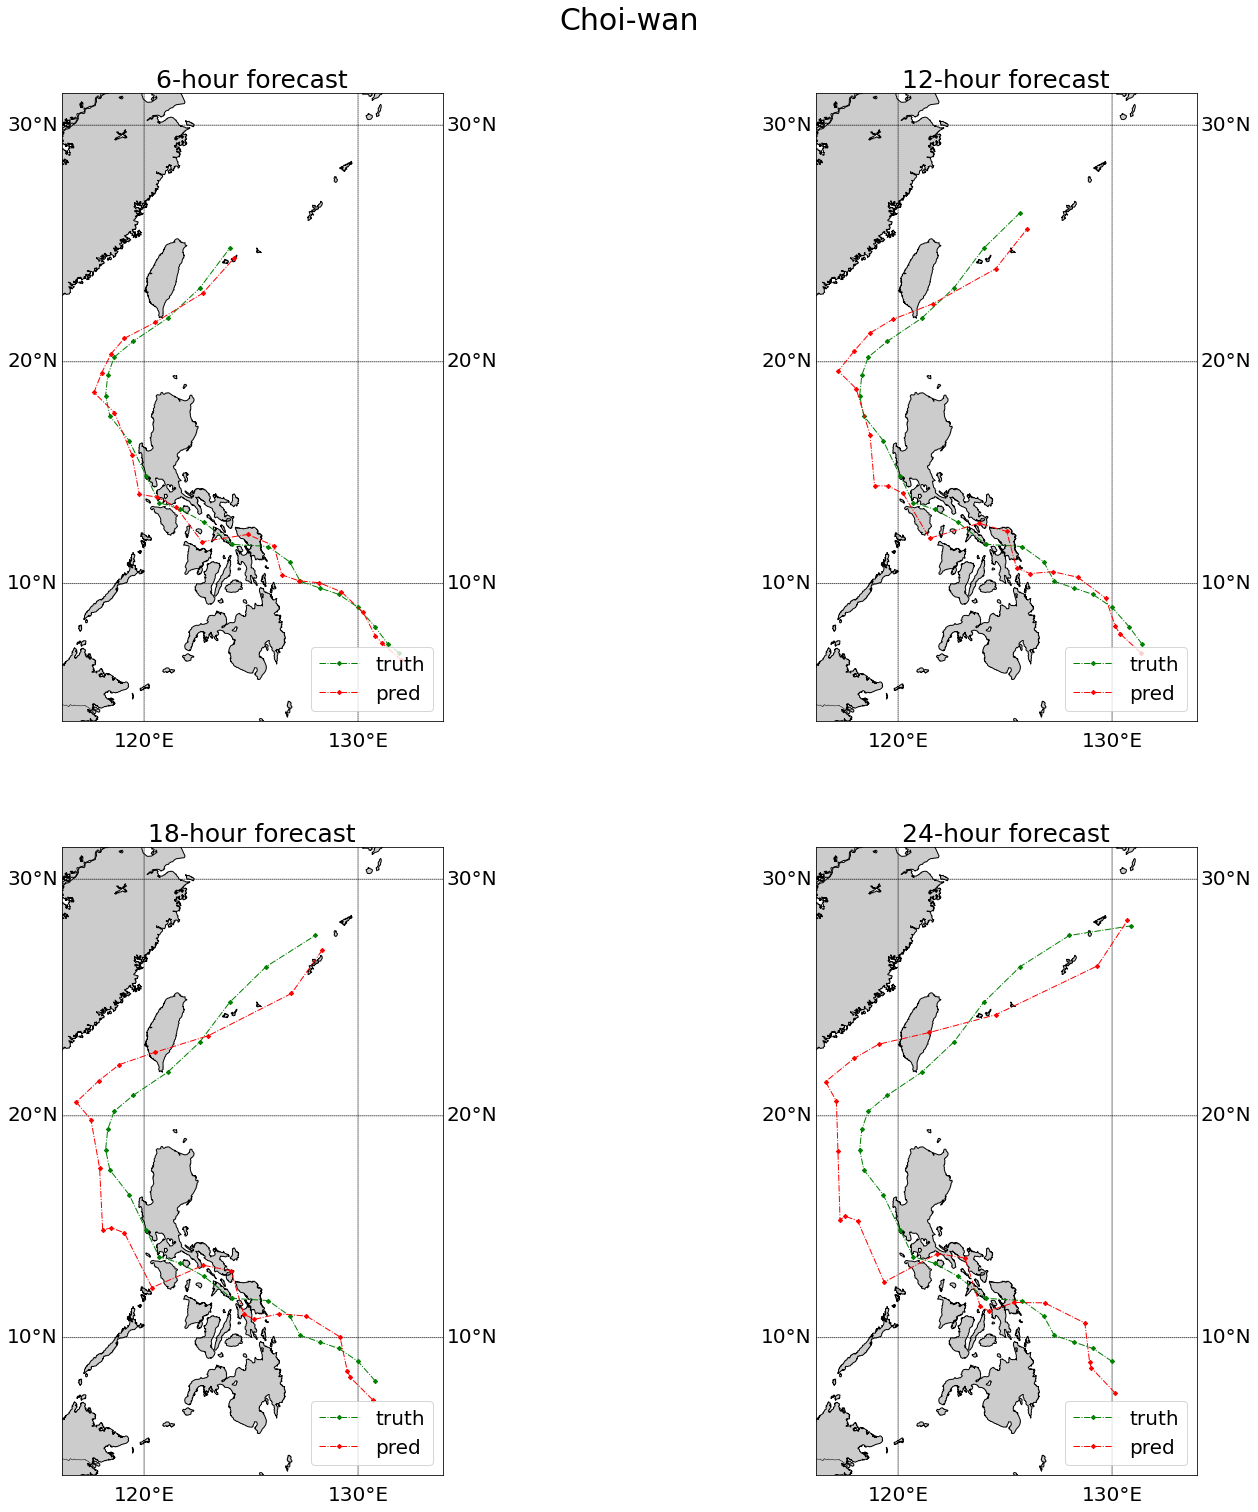

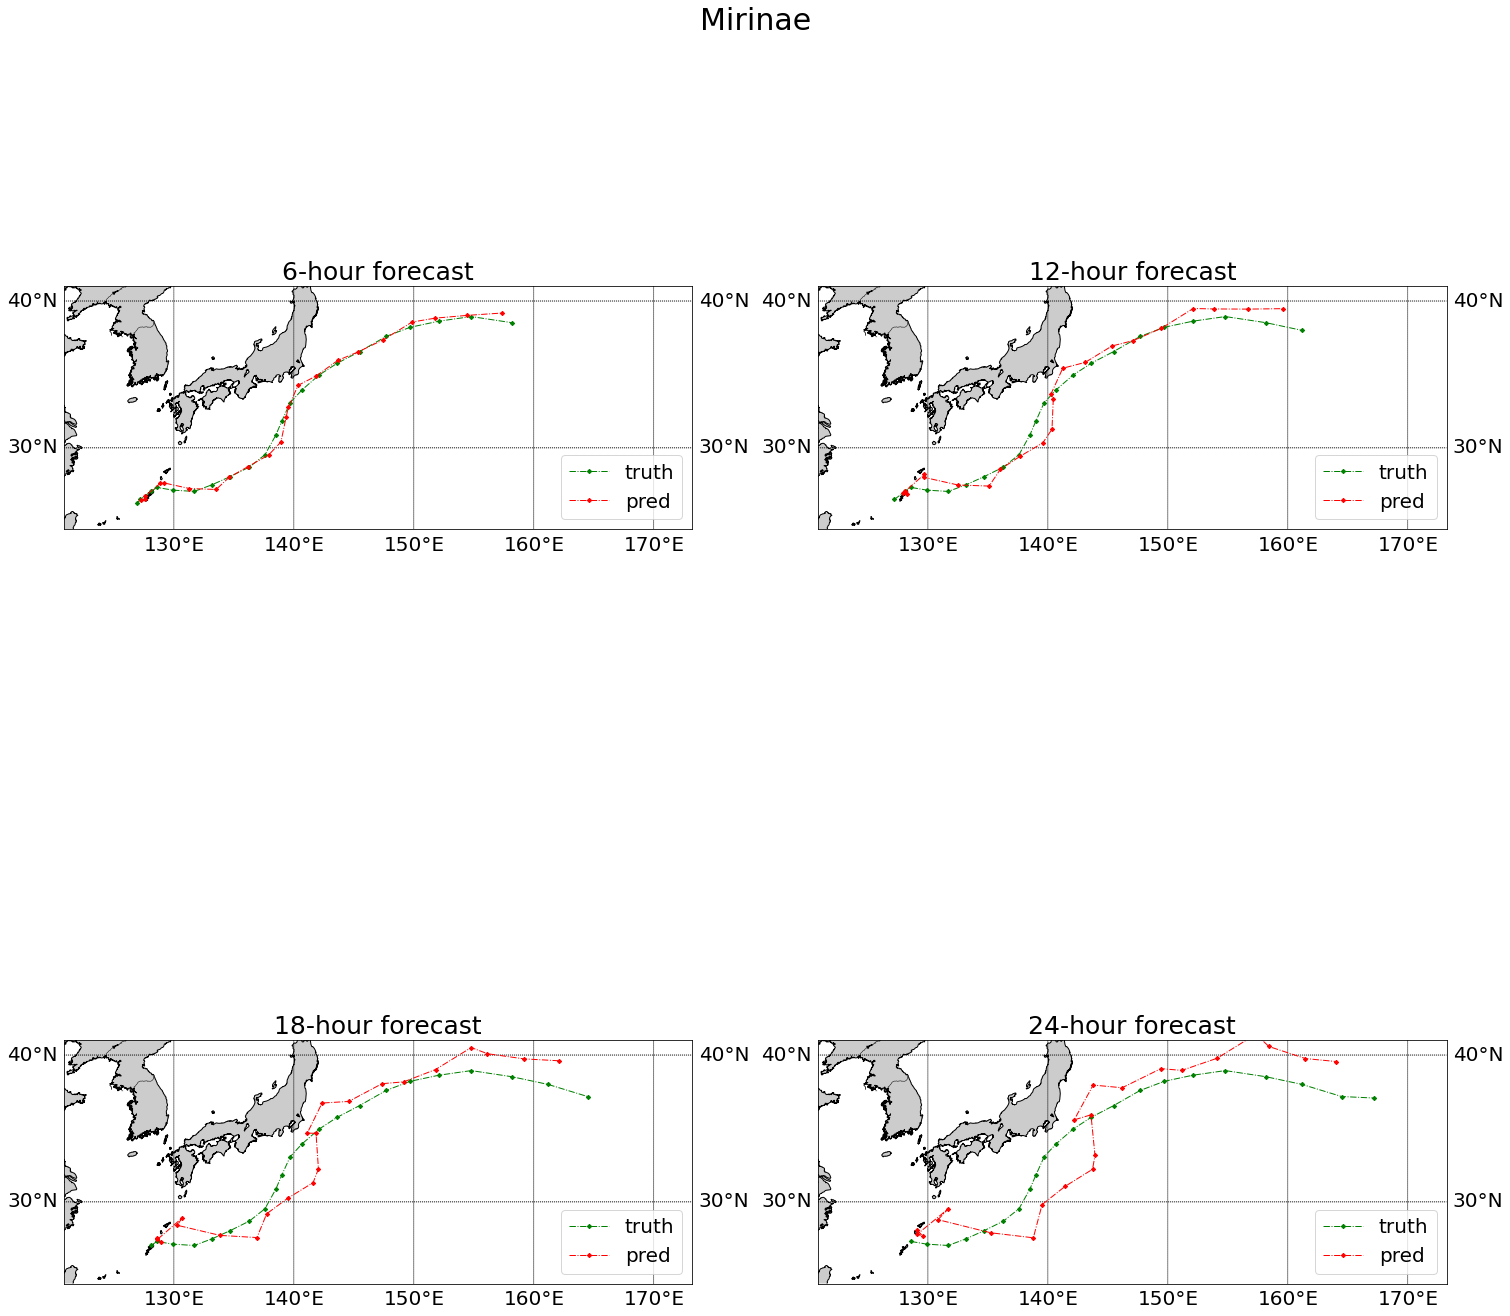

In [4]:
draw_DB(num=20)